In [1]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

# 🏥 Healthcare Premium Prediction: Comprehensive Data Analysis & Machine Learning 💻

This notebook performs end-to-end data preprocessing, exploratory data analysis, and machine learning modeling on healthcare premium data to predict insurance premium amounts based on demographic and health factors.

## 🎯 Objectives:
1. 📂 Load and preprocess healthcare premium dataset
2. 🧹 Perform comprehensive data cleaning and outlier treatment
3. 📊 Conduct univariate and bivariate exploratory data analysis
4. ⚙️ Engineer features and handle multicollinearity
5. 🤖 Train and evaluate multiple machine learning models
6. 📈 Analyze model performance and error patterns

---

## 📥 Data Loading & Initial Preprocessing 🔧
Loading the healthcare premium dataset and performing initial data exploration and standardization.

In [2]:
# Load healthcare premium data
df = pd.read_excel('premiums_young.xlsx')
print(f"Dataset loaded successfully with shape: {df.shape}")
df.head()

Dataset loaded successfully with shape: (24698, 13)


Age  Gender     Region Marital_status  Number Of Dependants BMI_Category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   30  Female  Southeast        Married                     3       Normal   
3   18    Male  Northeast      Unmarried                     0   Overweight   
4   22  Female  Northwest      Unmarried                     0  Underweight   

  Smoking_Status Employment_Status Income_Level  Income_Lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking          Salaried        > 40L            77   
3        Regular     Self-Employed        > 40L            99   
4     No Smoking        Freelancer         <10L             3   

       Medical History Insurance_Plan  Annual_Premium_Amount  
0             Diabetes         Bronze                   9053  
1             Diabetes         Bronze                  16339  
2           No Disease           Gold                  20303  
3  High blood pressure         Silver                  13365  
4           No Disease         Silver                  11050

In [3]:
# Standardize column names: convert to lowercase and replace spaces with underscores
print(f"Original dataset shape: {df.shape}")
df.columns = df.columns.str.replace(' ', '_').str.lower()
print(f"Standardized column names: {list(df.columns)}")

Original dataset shape: (24698, 13)
Standardized column names: ['age', 'gender', 'region', 'marital_status', 'number_of_dependants', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'income_lakhs', 'medical_history', 'insurance_plan', 'annual_premium_amount']


## 🧹 Exploratory Data Analysis & Data Cleaning

Systematic approach to handle data quality issues including missing values, duplicates, and data inconsistencies.

### 🔍 Handle Missing Values
Identifying and removing records with missing values to ensure data quality.

In [4]:
# Check and handle missing values
print("Missing values before cleaning:")
print(df.isna().sum())

# Remove rows with missing values
initial_shape = df.shape[0]
df.dropna(inplace=True)
final_shape = df.shape[0]

print(f"\nRemoved {initial_shape - final_shape} rows with missing values")
print("Missing values after cleaning:")
print(df.isna().sum())

Missing values before cleaning:
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           3
employment_status        1
income_level             6
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

Removed 9 rows with missing values
Missing values after cleaning:
age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64


### 🔄 Duplicate Records Removal 
Ensuring data uniqueness by identifying and removing duplicate entries.

In [5]:
# Check and remove duplicate records
initial_duplicates = df.duplicated().sum()
print(f"Duplicate records found: {initial_duplicates}")

df.drop_duplicates(inplace=True)
final_duplicates = df.duplicated().sum()

print(f"Duplicate records after removal: {final_duplicates}")
print(f"Final dataset shape: {df.shape}")

Duplicate records found: 0
Duplicate records after removal: 0
Final dataset shape: (24689, 13)


In [6]:
# Get statistical summary of numerical columns
print("Statistical summary of the dataset:")
df.describe()

Statistical summary of the dataset:


age  number_of_dependants  income_lakhs  annual_premium_amount
count  24689.000000          24689.000000  24689.000000           24689.000000
mean      22.711612              1.022399     22.488477            9947.432460
std        3.334971              1.239221     23.166352            5091.349219
min       18.000000             -3.000000      1.000000            3501.000000
25%       20.000000              0.000000      7.000000            6521.000000
50%       22.000000              1.000000     16.000000            8648.000000
75%       25.000000              2.000000     31.000000           11809.000000
max       30.000000              5.000000    790.000000           33489.000000

### 🔧 Data Type Validation & Correction ✅
Fixing data inconsistencies and ensuring appropriate data types for analysis.

In [7]:
# Check for negative values in number_of_dependants
negative_dependants = df[df['number_of_dependants'] < 0]['number_of_dependants'].unique()
print(f"Negative values in dependants column: {negative_dependants}")

Negative values in dependants column: [-3 -1]


In [8]:
df.head()

age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   
2   30  Female  Southeast        Married                     3       Normal   
3   18    Male  Northeast      Unmarried                     0   Overweight   
4   22  Female  Northwest      Unmarried                     0  Underweight   

  smoking_status employment_status income_level  income_lakhs  \
0     No Smoking          Salaried         <10L             6   
1        Regular          Salaried         <10L             6   
2     No Smoking          Salaried        > 40L            77   
3        Regular     Self-Employed        > 40L            99   
4     No Smoking        Freelancer         <10L             3   

       medical_history insurance_plan  annual_premium_amount  
0             Diabetes         Bronze                   9053  
1             Diabetes         Bronze                  16339  
2           No Disease           Gold                  20303  
3  High blood pressure         Silver                  13365  
4           No Disease         Silver                  11050

In [9]:
# Convert negative values to positive (absolute values)
df['number_of_dependants'] = df['number_of_dependants'].abs()
print("Statistical summary after converting negative values:")
print(df.describe())

Statistical summary after converting negative values:
                age  number_of_dependants  income_lakhs  annual_premium_amount
count  24689.000000          24689.000000  24689.000000           24689.000000
mean      22.711612              1.027340     22.488477            9947.432460
std        3.334971              1.235128     23.166352            5091.349219
min       18.000000              0.000000      1.000000            3501.000000
25%       20.000000              0.000000      7.000000            6521.000000
50%       22.000000              1.000000     16.000000            8648.000000
75%       25.000000              2.000000     31.000000           11809.000000
max       30.000000              5.000000    790.000000           33489.000000


## 📊 Exploratory Data Analysis (EDA) 🔍

Comprehensive analysis of both numerical and categorical variables to understand data distributions, relationships, and patterns.

### 📈 Numerical Variables Analysis 📊
Analyzing distributions, outliers, and relationships of continuous variables.

#### 📦 Box plots for numeric columns
Visual representation of data distribution and outlier identification.

In [10]:
# Identify numerical columns for analysis
numeric_col = df.select_dtypes(include=['float64','int64']).columns
print(f"Numerical columns identified for analysis: {list(numeric_col)}")

Numerical columns identified for analysis: ['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount']


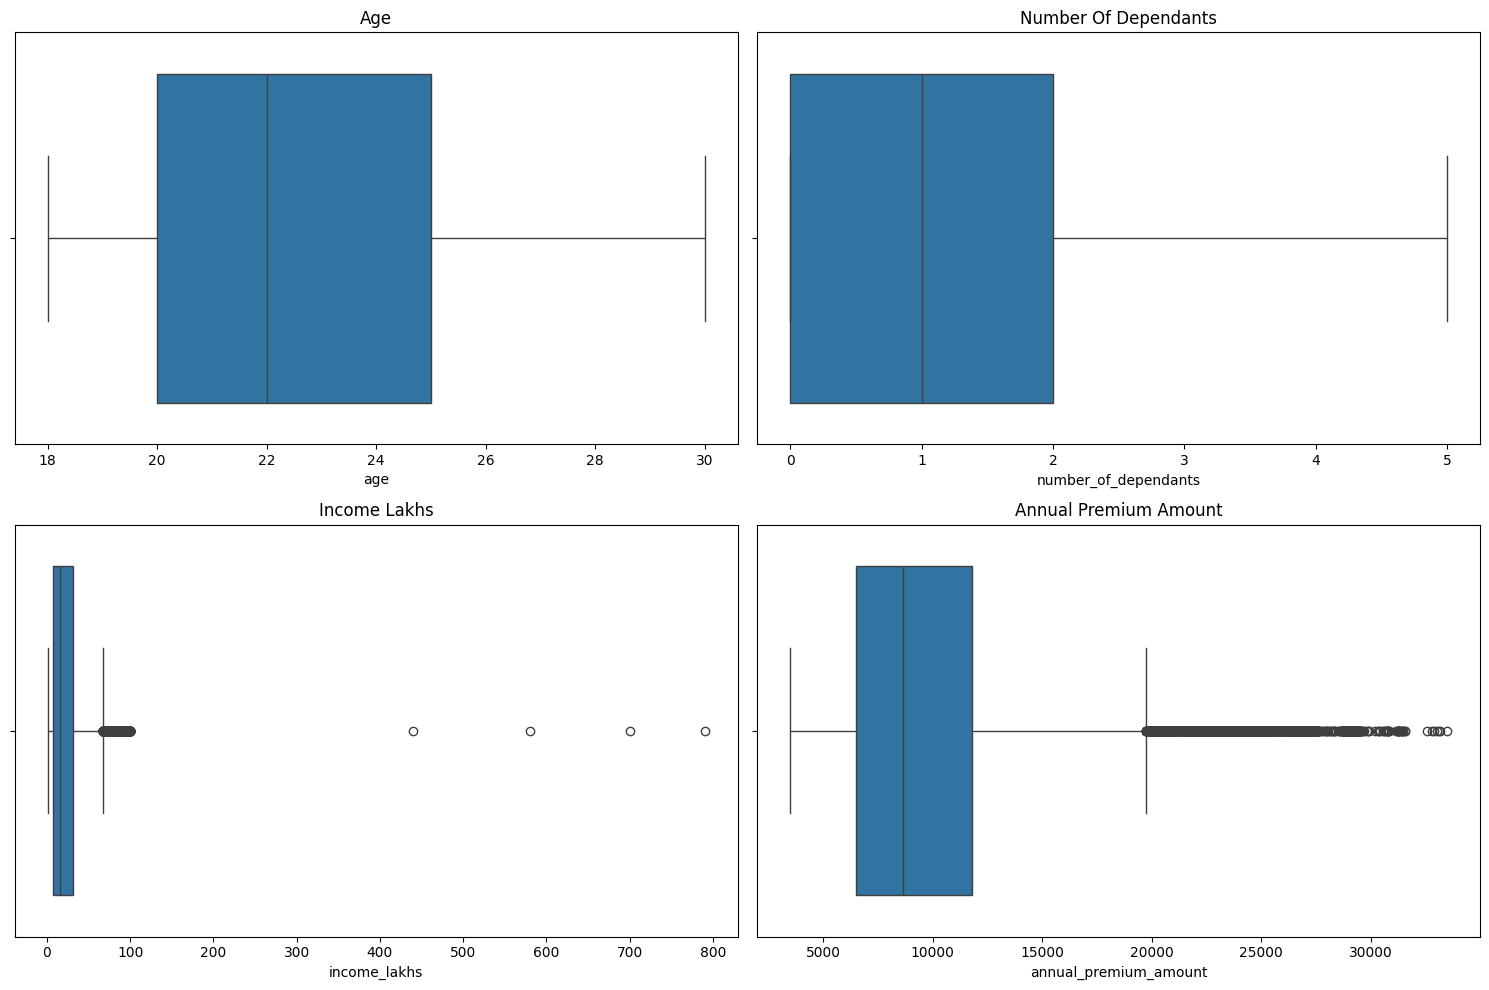

In [11]:
def plot_boxplots(df, numeric_cols):
    """Plot boxplots - 2 per row for outlier detection"""
    n = len(numeric_cols)
    rows = int(np.ceil(n / 2))
    
    fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
    axes = axes.flatten() if rows > 1 else [axes] if n == 1 else axes
    
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(col.replace("_", " ").title())
    
    # Hide unused plots
    for i in range(n, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Generate box plots for all numerical columns
plot_boxplots(df, numeric_col)

### 🎂 Outlier Treatment: Age Column
Removing unrealistic age values (>100 years) to improve data quality.

In [12]:
# Identify extreme age values
extreme_ages = df[df['age'] > 100]['age'].unique()
print(f"Extreme age values found: {extreme_ages}")

Extreme age values found: []


In [13]:
# Create cleaned dataset by removing ages > 100
df1 = df[df['age'] < 100].copy()
print(f"Records removed due to extreme age: {len(df) - len(df1)}")
print("Statistical summary after age cleaning:")
df1.describe()

Records removed due to extreme age: 0
Statistical summary after age cleaning:


age  number_of_dependants  income_lakhs  annual_premium_amount
count  24689.000000          24689.000000  24689.000000           24689.000000
mean      22.711612              1.027340     22.488477            9947.432460
std        3.334971              1.235128     23.166352            5091.349219
min       18.000000              0.000000      1.000000            3501.000000
25%       20.000000              0.000000      7.000000            6521.000000
50%       22.000000              1.000000     16.000000            8648.000000
75%       25.000000              2.000000     31.000000           11809.000000
max       30.000000              5.000000    790.000000           33489.000000

### 💰 Outlier Treatment: Income Column
Using quantile-based approach to handle income outliers while preserving data integrity.

In [14]:
def get_lower_upper(col):
    """Calculate outlier bounds using IQR method"""
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - IQR * 1.5
    upper = Q3 + IQR * 1.5
    return lower, upper

In [15]:
# Calculate outlier bounds for income
lower, upper = get_lower_upper(df1['income_lakhs'])
print(f"Income outlier bounds: Lower = {lower}, Upper = {upper}")
lower, upper

Income outlier bounds: Lower = -29.0, Upper = 67.0


(-29.0, 67.0)

In [16]:
# Check number of outliers above upper bound
outliers_count = df1[df1['income_lakhs'] > upper].shape[0]
print(f"Records with income outliers: {outliers_count}")
df1[df1['income_lakhs'] > upper].shape

Records with income outliers: 1656


(1656, 13)

In [17]:
# Use 99.9th percentile as threshold (conservative approach)
quantile_threshold = df1['income_lakhs'].quantile(0.999)
print(f"99.9th percentile threshold: {quantile_threshold}")
quantile_threshold

99.9th percentile threshold: 100.0


np.float64(100.0)

In [18]:
# Apply income filtering
initial_count = len(df1)
df2 = df1[df1['income_lakhs'] <= quantile_threshold].copy()
removed_count = initial_count - len(df1)

print(f"Records removed due to extreme income: {removed_count}")
df2.describe()

Records removed due to extreme income: 0


age  number_of_dependants  income_lakhs  annual_premium_amount
count  24685.000000          24685.000000   24685.00000           24685.000000
mean      22.711890              1.027507      22.39044            9947.483330
std        3.335158              1.235159      21.78630            5091.677922
min       18.000000              0.000000       1.00000            3501.000000
25%       20.000000              0.000000       7.00000            6520.000000
50%       22.000000              1.000000      16.00000            8648.000000
75%       25.000000              2.000000      31.00000           11809.000000
max       30.000000              5.000000     100.00000           33489.000000

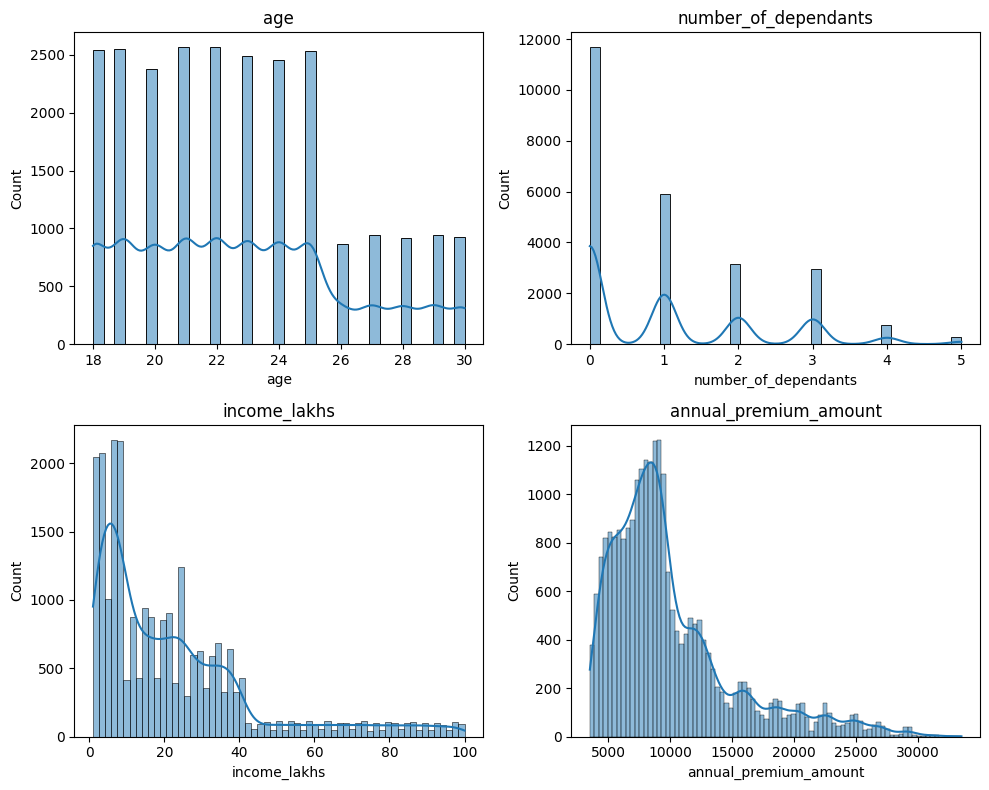

In [19]:
# Create histogram plots for cleaned numerical variables
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i, column in enumerate(numeric_col):
    ax = axs[i//2, i%2]  # Position subplot in grid
    sns.histplot(df2[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [20]:
# Display sample of cleaned data
df2.sample(3)

age gender     region marital_status  number_of_dependants  \
15802   22   Male  Southwest      Unmarried                     0   
14454   25   Male  Southwest        Married                     2   
23510   22   Male  Southeast      Unmarried                     1   

      bmi_category smoking_status employment_status income_level  \
15802      Obesity     No Smoking        Freelancer         <10L   
14454   Overweight     No Smoking     Self-Employed    25L - 40L   
23510  Underweight        Regular        Freelancer    10L - 25L   

       income_lakhs medical_history insurance_plan  annual_premium_amount  
15802             3      No Disease         Bronze                   6014  
14454            25         Thyroid         Silver                  11205  
23510            11      No Disease         Bronze                   9276

### 🔗 Bivariate Analysis: Numeric Columns
Analyzing relationships between numerical features and premium amounts.

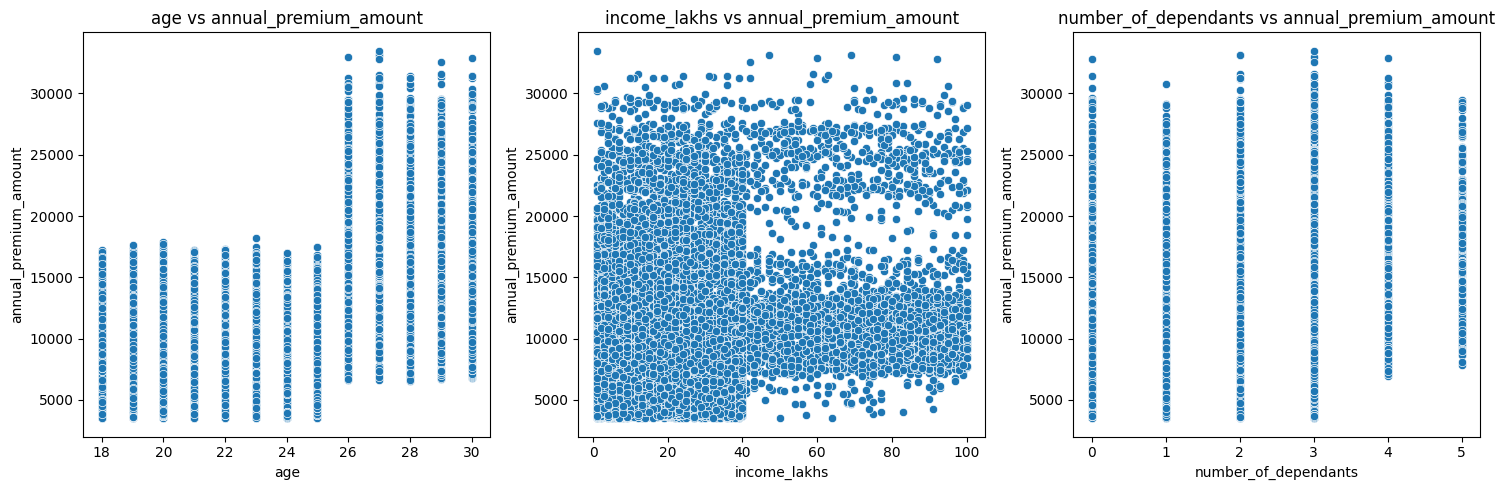

In [21]:
# List of numeric features to analyze relationships
numeric_feature = ['age', 'income_lakhs', 'number_of_dependants']

# Create scatter plots for feature relationships
fig, axes = plt.subplots(1, len(numeric_feature), figsize=(5 * len(numeric_feature), 5))

# Plot each feature against premium amount
for i, feature in enumerate(numeric_feature):
    sns.scatterplot(x=df2[feature], y=df2['annual_premium_amount'], ax=axes[i])
    axes[i].set_title(f'{feature} vs annual_premium_amount')

plt.tight_layout()
plt.show()

### 📋 Categorical Variables Analysis 🏷️
Examining distributions and relationships of categorical variables through various visualization techniques.

In [22]:
# Identify and examine categorical columns
category_col = df2.select_dtypes(include=['O']).columns

# Display unique values for each categorical column
for col in category_col:
    print(f'{col}:', df2[col].unique())

gender: ['Male' 'Female']
region: ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status: ['Unmarried' 'Married']
bmi_category: ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status: ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status: ['Salaried' 'Self-Employed' 'Freelancer']
income_level: ['<10L' '> 40L' '10L - 25L' '25L - 40L']
medical_history: ['Diabetes' 'No Disease' 'High blood pressure' 'Heart disease'
 'Diabetes & High blood pressure' 'High blood pressure & Heart disease'
 'Diabetes & Thyroid' 'Diabetes & Heart disease' 'Thyroid']
insurance_plan: ['Bronze' 'Gold' 'Silver']


In [23]:
# Standardize smoking status categories
df2['smoking_status'].replace({
    'Smoking=0': 'No Smoking',
    'Does Not Smoke':'No Smoking',
    'Not Smoking':'No Smoking',
},inplace=True)
print("Standardized smoking status:", df2['smoking_status'].unique())

Standardized smoking status: ['No Smoking' 'Regular' 'Occasional']


### 📊 Univariate Analysis
Analyzing distribution of categorical variables using percentage-based visualizations.

In [24]:
# Calculate gender distribution percentages
pct_gender = df2['gender'].value_counts(normalize=True)*100
pct_gender

gender
Male      55.130646
Female    44.869354
Name: proportion, dtype: float64

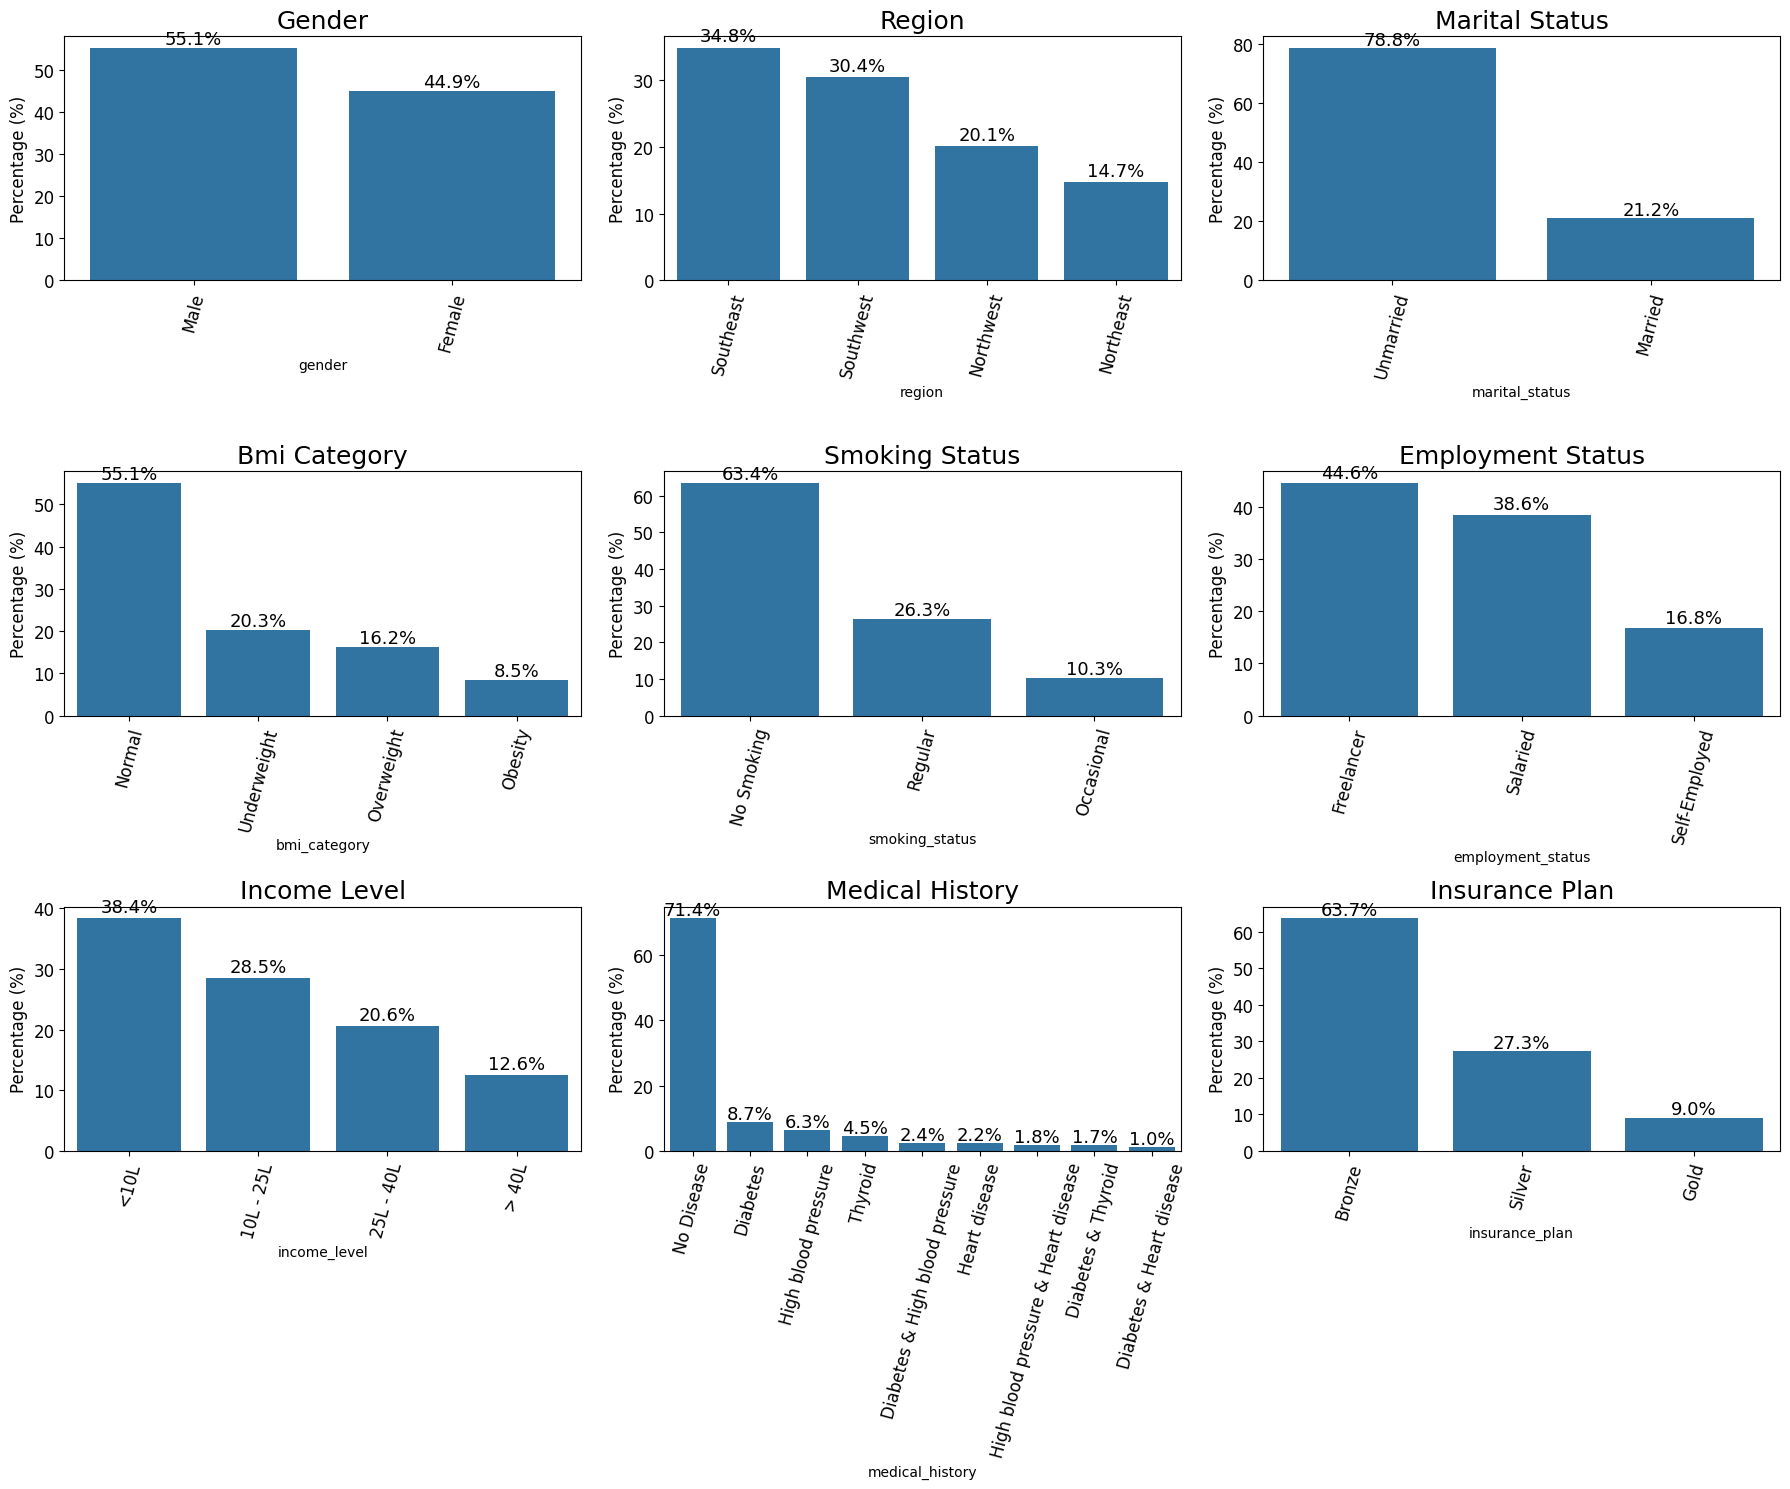

In [25]:
def plot_categories(df, columns, figsize=(18, 15)):
    """Create bar plots showing percentage distributions of categorical variables"""
    n_cols = len(columns)
    rows = int(np.ceil(n_cols / 3))
    cols = min(3, n_cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    axes = axes.flatten() if n_cols > 1 else [axes]
    
    for i, col in enumerate(columns):
        # Calculate percentage distribution
        pct = df[col].value_counts(normalize=True) * 100
        
        # Create barplot
        sns.barplot(x=pct.index, y=pct.values, ax=axes[i])
        axes[i].set_title(f'{col.replace("_", " ").title()}', fontsize=18)
        axes[i].set_ylabel('Percentage (%)', fontsize=12)
        axes[i].tick_params(axis='x', rotation=75, labelsize=12)
        axes[i].tick_params(axis='y', labelsize=12)
        
        # Add percentage labels on bars
        for j, v in enumerate(pct.values):
            axes[i].text(j, v + 1, f'{v:.1f}%', ha='center', fontsize=13)
    
    # Hide unused subplots
    for i in range(n_cols, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Generate categorical distribution plots
plot_categories(df2, category_col)

### 🔗 Bivariate Analysis
Examining relationships between categorical variables using multiple visualization techniques.

Cross-tabulation: Income Level vs Insurance Plan
insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         4574   514    1945
25L - 40L         3423   361    1293
<10L              7587   496    1390
> 40L              151   852    2099


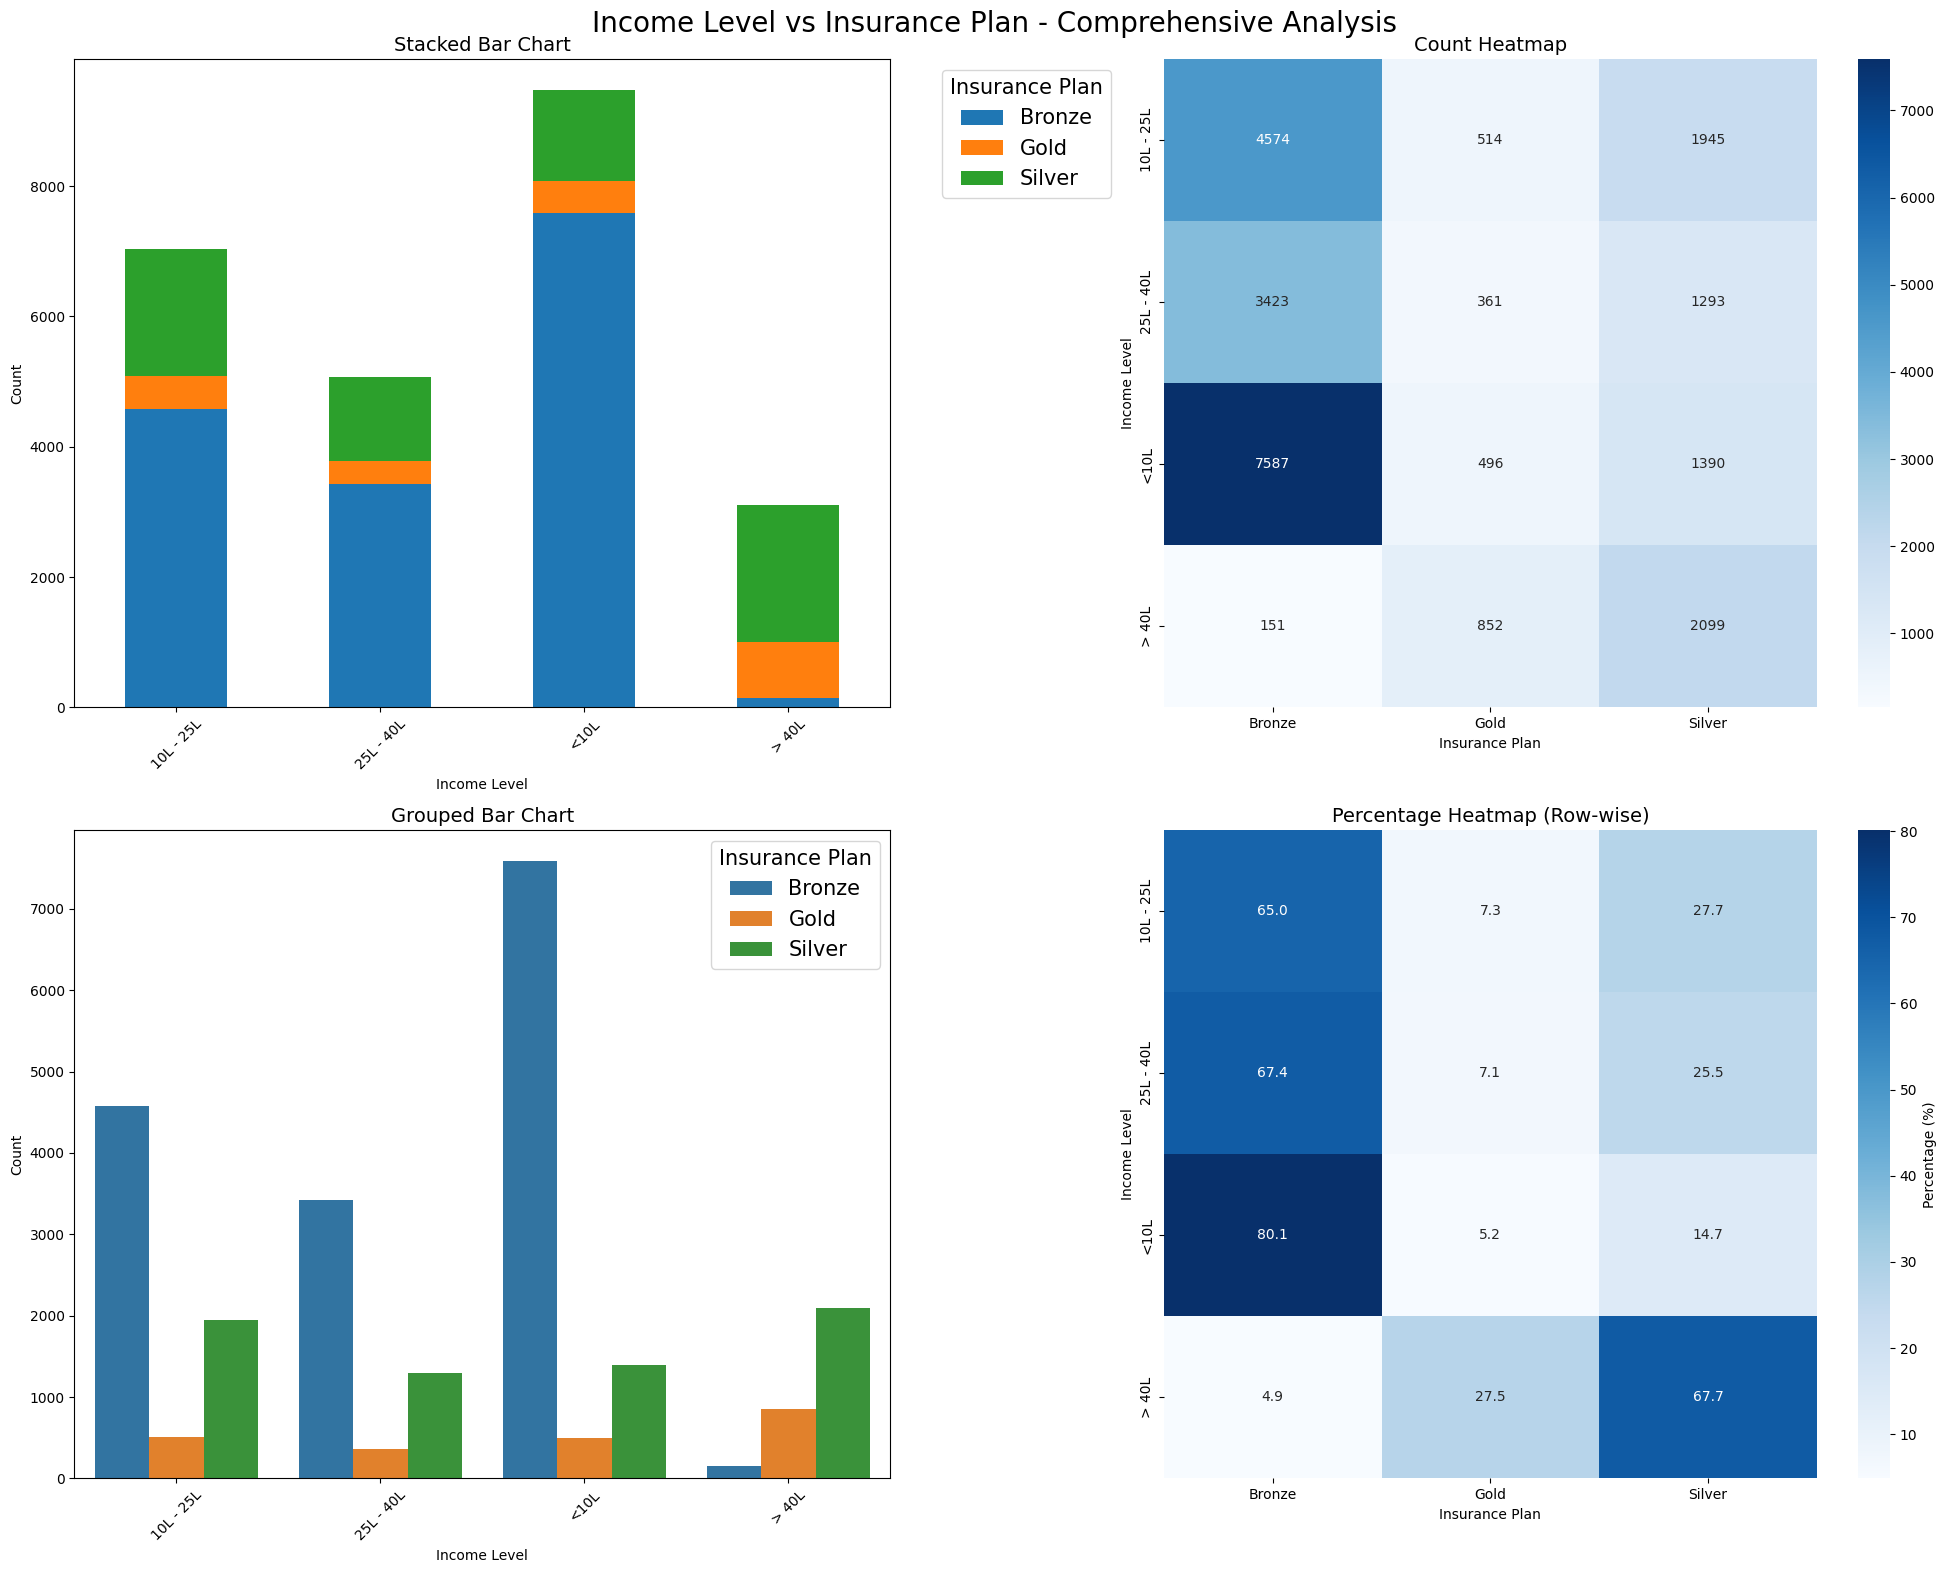

In [26]:
# Create comprehensive analysis of income level vs insurance plan relationship
crosstab = pd.crosstab(df2['income_level'], df2['insurance_plan'])
print("Cross-tabulation: Income Level vs Insurance Plan")
print(crosstab)

# Create subplot layout for multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Income Level vs Insurance Plan - Comprehensive Analysis', fontsize=20, y=0.98)

# Method 1: Stacked bar plot
crosstab.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Stacked Bar Chart', fontsize=14)
axes[0,0].set_xlabel('Income Level')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)
legend = axes[0,0].legend(title='Insurance Plan', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15)
legend.get_title().set_fontsize(15)

# Method 2: Heatmap visualization (Raw Counts)
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues', ax=axes[0,1])
axes[0,1].set_title('Count Heatmap', fontsize=14)
axes[0,1].set_xlabel('Insurance Plan')
axes[0,1].set_ylabel('Income Level')

# Method 3: Grouped bar chart
crosstab_reset = crosstab.reset_index().melt(id_vars='income_level', 
                                           var_name='insurance_plan', 
                                           value_name='count')
sns.barplot(data=crosstab_reset, x='income_level', y='count', hue='insurance_plan', ax=axes[1,0])
axes[1,0].set_title('Grouped Bar Chart', fontsize=14)
axes[1,0].set_xlabel('Income Level')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)
legend = axes[1,0].legend(title='Insurance Plan', fontsize=15)
legend.get_title().set_fontsize(15)

# Method 4: Percentage heatmap
crosstab_pct = pd.crosstab(df2['income_level'], df2['insurance_plan'], normalize='index') * 100
sns.heatmap(crosstab_pct, annot=True, fmt='.1f', cmap='Blues', 
            cbar_kws={'label': 'Percentage (%)'}, ax=axes[1,1])
axes[1,1].set_title('Percentage Heatmap (Row-wise)', fontsize=14)
axes[1,1].set_xlabel('Insurance Plan')
axes[1,1].set_ylabel('Income Level')

plt.tight_layout()
plt.show()

In [27]:
df2.head(2)

age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   

  smoking_status employment_status income_level  income_lakhs medical_history  \
0     No Smoking          Salaried         <10L             6        Diabetes   
1        Regular          Salaried         <10L             6        Diabetes   

  insurance_plan  annual_premium_amount  
0         Bronze                   9053  
1         Bronze                  16339

## ⚙️ Advanced Feature Engineering 🛠️

Creating new features and transforming existing ones to improve model performance and interpretability.

### 🩺 Medical Risk Score Calculation ⚕️
Creating a composite risk score based on medical history to capture health-related premium factors.

In [28]:
# Define the risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df2[['disease1', 'disease2']] = df2['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df2['disease1'].fillna('none', inplace=True)
df2['disease2'].fillna('none', inplace=True)
df2['total_risk_score'] = 0

for disease in ['disease1', 'disease2']:
    df2['total_risk_score'] += df2[disease].map(risk_scores)

# Normalize the risk score to a range of 0 to 1
max_score = df2['total_risk_score'].max()
min_score = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - min_score) / (max_score - min_score)
df2.head(2)

age  gender     region marital_status  number_of_dependants bmi_category  \
0   26    Male  Northwest      Unmarried                     0       Normal   
1   29  Female  Southeast        Married                     2      Obesity   

  smoking_status employment_status income_level  income_lakhs medical_history  \
0     No Smoking          Salaried         <10L             6        Diabetes   
1        Regular          Salaried         <10L             6        Diabetes   

  insurance_plan  annual_premium_amount  disease1 disease2  total_risk_score  \
0         Bronze                   9053  diabetes     none                 6   
1         Bronze                  16339  diabetes     none                 6   

   normalized_risk_score  
0               0.428571  
1               0.428571

### 🔄 Categorical Encoding & Feature Transformation 📊
Converting categorical variables to numerical format and applying appropriate transformations.

In [29]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze':1, 'Silver':2, 'Gold':3})
df2['income_level'] = df2['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

age  number_of_dependants  income_level  income_lakhs medical_history  \
0   26                     0             1             6        Diabetes   
1   29                     2             1             6        Diabetes   
2   30                     3             4            77      No Disease   

   insurance_plan  annual_premium_amount    disease1 disease2  \
0               1                   9053    diabetes     none   
1               1                  16339    diabetes     none   
2               3                  20303  no disease     none   

   total_risk_score  ...  region_Southeast  region_Southwest  \
0                 6  ...                 0                 0   
1                 6  ...                 1                 0   
2                 0  ...                 1                 0   

   marital_status_Unmarried  bmi_category_Obesity  bmi_category_Overweight  \
0                         1                     0                        0   
1                         0                     1                        0   
2                         0                     0                        0   

   bmi_category_Underweight  smoking_status_Occasional  \
0                         0                          0   
1                         0                          0   
2                         0                          0   

   smoking_status_Regular  employment_status_Salaried  \
0                       0                           1   
1                       1                           1   
2                       0                           1   

   employment_status_Self-Employed  
0                                0  
1                                0  
2                                0  

[3 rows x 23 columns]

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24685 entries, 0 to 24697
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              24685 non-null  int64  
 1   number_of_dependants             24685 non-null  int64  
 2   income_level                     24685 non-null  int64  
 3   income_lakhs                     24685 non-null  int64  
 4   medical_history                  24685 non-null  object 
 5   insurance_plan                   24685 non-null  int64  
 6   annual_premium_amount            24685 non-null  int64  
 7   disease1                         24685 non-null  object 
 8   disease2                         24685 non-null  object 
 9   total_risk_score                 24685 non-null  int64  
 10  normalized_risk_score            24685 non-null  float64
 11  gender_Male                      24685 non-null  int64  
 12  region_Northwest       

In [31]:
df4 = df3.drop(columns=['medical_history','disease1','disease2','total_risk_score']).copy()
df4.head(3)

age  number_of_dependants  income_level  income_lakhs  insurance_plan  \
0   26                     0             1             6               1   
1   29                     2             1             6               1   
2   30                     3             4            77               3   

   annual_premium_amount  normalized_risk_score  gender_Male  \
0                   9053               0.428571            1   
1                  16339               0.428571            0   
2                  20303               0.000000            0   

   region_Northwest  region_Southeast  region_Southwest  \
0                 1                 0                 0   
1                 0                 1                 0   
2                 0                 1                 0   

   marital_status_Unmarried  bmi_category_Obesity  bmi_category_Overweight  \
0                         1                     0                        0   
1                         0                     1                        0   
2                         0                     0                        0   

   bmi_category_Underweight  smoking_status_Occasional  \
0                         0                          0   
1                         0                          0   
2                         0                          0   

   smoking_status_Regular  employment_status_Salaried  \
0                       0                           1   
1                       1                           1   
2                       0                           1   

   employment_status_Self-Employed  
0                                0  
1                                0  
2                                0

### 🔗 Multicollinearity Assessment 📉
Detecting and addressing multicollinearity issues using Variance Inflation Factor (VIF) analysis.

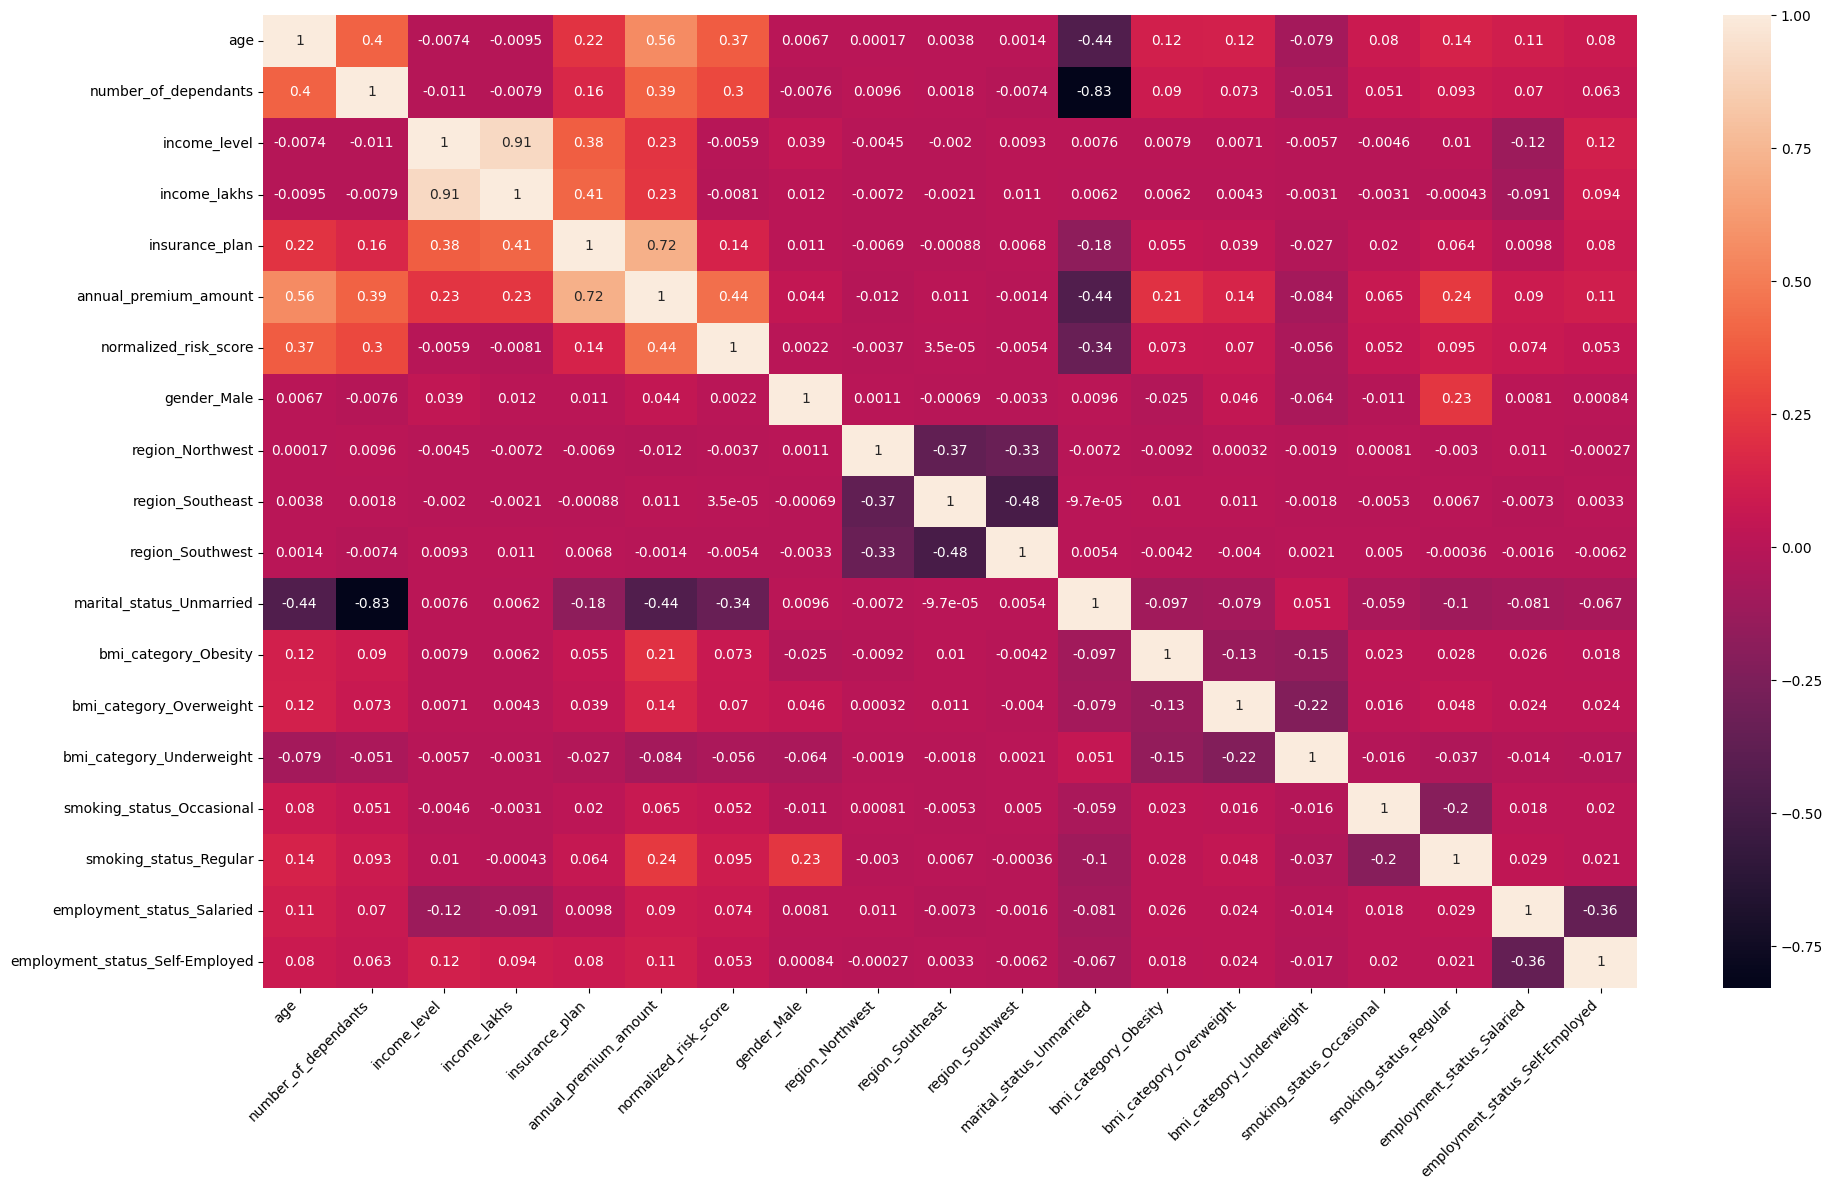

In [32]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [33]:
X = df4.drop('annual_premium_amount',axis=1)
y = df4['annual_premium_amount']

cols_to_scale = ['age','number_of_dependants', 'income_level',  'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

age  number_of_dependants  income_level  income_lakhs  \
count  24685.000000          24685.000000  24685.000000  24685.000000   
mean       0.392657              0.205501      0.357748      0.216065   
std        0.277930              0.247032      0.347493      0.220064   
min        0.000000              0.000000      0.000000      0.000000   
25%        0.166667              0.000000      0.000000      0.060606   
50%        0.333333              0.200000      0.333333      0.151515   
75%        0.583333              0.400000      0.666667      0.303030   
max        1.000000              1.000000      1.000000      1.000000   

       insurance_plan  normalized_risk_score   gender_Male  region_Northwest  \
count    24685.000000           24685.000000  24685.000000      24685.000000   
mean         0.226312               0.154993      0.551306          0.201013   
std          0.327064               0.269517      0.497371          0.400766   
min          0.000000               0.000000      0.000000          0.000000   
25%          0.000000               0.000000      0.000000          0.000000   
50%          0.000000               0.000000      1.000000          0.000000   
75%          0.500000               0.357143      1.000000          0.000000   
max          1.000000               1.000000      1.000000          1.000000   

       region_Southeast  region_Southwest  marital_status_Unmarried  \
count      24685.000000      24685.000000              24685.000000   
mean           0.348228          0.304112                  0.788211   
std            0.476418          0.460040                  0.408584   
min            0.000000          0.000000                  0.000000   
25%            0.000000          0.000000                  1.000000   
50%            0.000000          0.000000                  1.000000   
75%            1.000000          1.000000                  1.000000   
max            1.000000          1.000000                  1.000000   

       bmi_category_Obesity  bmi_category_Overweight  \
count          24685.000000             24685.000000   
mean               0.084505                 0.161799   
std                0.278149                 0.368273   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 0.000000   
max                1.000000                 1.000000   

       bmi_category_Underweight  smoking_status_Occasional  \
count              24685.000000               24685.000000   
mean                   0.203038                   0.102694   
std                    0.402269                   0.303565   
min                    0.000000                   0.000000   
25%                    0.000000                   0.000000   
50%                    0.000000                   0.000000   
75%                    0.000000                   0.000000   
max                    1.000000                   1.000000   

       smoking_status_Regular  employment_status_Salaried  \
count            24685.000000                 24685.00000   
mean                 0.263196                     0.38574   
std                  0.440377                     0.48678   
min                  0.000000                     0.00000   
25%                  0.000000                     0.00000   
50%                  0.000000                     0.00000   
75%                  1.000000                     1.00000   
max                  1.000000                     1.00000   

       employment_status_Self-Employed  
count                     24685.000000  
mean                          0.168280  
std                           0.374123  
min                           0.000000  
25%                           0.000000  
50%                           0.000000  
75%                           0.000000  
max                           1.000000

In [34]:
def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

calculate_vif(X)

Column        VIF
0                               age   3.931676
1              number_of_dependants   3.016246
2                      income_level  11.860577
3                      income_lakhs  11.583427
4                    insurance_plan   1.925139
5             normalized_risk_score   1.620136
6                       gender_Male   2.328268
7                  region_Northwest   2.135694
8                  region_Southeast   2.969757
9                  region_Southwest   2.716880
10         marital_status_Unmarried   5.256281
11             bmi_category_Obesity   1.174686
12          bmi_category_Overweight   1.313875
13         bmi_category_Underweight   1.349960
14        smoking_status_Occasional   1.178730
15           smoking_status_Regular   1.546782
16       employment_status_Salaried   1.884543
17  employment_status_Self-Employed   1.403476

In [35]:
X.drop('income_level',axis=1,inplace=True)
calculate_vif(X)

Column       VIF
0                               age  3.930683
1              number_of_dependants  3.013604
2                      income_lakhs  2.380920
3                    insurance_plan  1.924259
4             normalized_risk_score  1.620040
5                       gender_Male  2.316701
6                  region_Northwest  2.134675
7                  region_Southeast  2.968600
8                  region_Southwest  2.715923
9          marital_status_Unmarried  5.234078
10             bmi_category_Obesity  1.174548
11          bmi_category_Overweight  1.313777
12         bmi_category_Underweight  1.349900
13        smoking_status_Occasional  1.178729
14           smoking_status_Regular  1.546573
15       employment_status_Salaried  1.878232
16  employment_status_Self-Employed  1.400103

## 🤖 Machine Learning Model Development & Evaluation 📊

Training and evaluating multiple regression models to predict healthcare premium amounts.

In [36]:
# Prepare features and target variable for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Display dataset split information
print("📊 Dataset Split Information:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training target: {y_train.shape}")
print(f"Test target: {y_test.shape}")

📊 Dataset Split Information:
Training set: (18513, 17)
Test set: (6172, 17)
Training target: (18513,)
Test target: (6172,)


### 📊 Model Performance Comparison Framework 🏆
Setting up comprehensive evaluation framework for multiple algorithms and comparing their performance metrics.

In [37]:
# Initialize dictionary to store model performance results
model_results = {}

def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    """
    Comprehensive model evaluation function
    
    Parameters:
    - model: Machine learning model to evaluate
    - model_name: String name for the model
    - X_train, X_test, y_train, y_test: Training and test datasets
    
    Returns:
    - model: Trained model
    - y_pred_test: Test predictions
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate comprehensive performance metrics
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    
    # Calculate additional metrics
    mae = np.mean(np.abs(y_test - y_pred_test))
    mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    
    # Store results in global dictionary
    model_results[model_name] = {
        'train_r2': train_score,
        'test_r2': test_score,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'mape': mape
    }
    
    # Display results
    print(f"🎯 {model_name} Performance Metrics:")
    print(f"   📈 Training R²: {train_score:.4f}")
    print(f"   📊 Test R²: {test_score:.4f}")
    print(f"   📉 MSE: {mse:.2f}")
    print(f"   🎲 RMSE: {rmse:.2f}")
    print(f"   📋 MAE: {mae:.2f}")
    print(f"   📊 MAPE: {mape:.2f}%")
    print("-" * 50)
    
    return model, y_pred_test

### 📉 Linear Regression Baseline Model 📊
Implementing basic linear regression as baseline for comparison.

🚀 Training Linear Regression Model...
🎯 Linear Regression Performance Metrics:
   📈 Training R²: 0.7873
   📊 Test R²: 0.7825
   📉 MSE: 5546735.54
   🎲 RMSE: 2355.15
   📋 MAE: 1908.45
   📊 MAPE: 23.08%
--------------------------------------------------


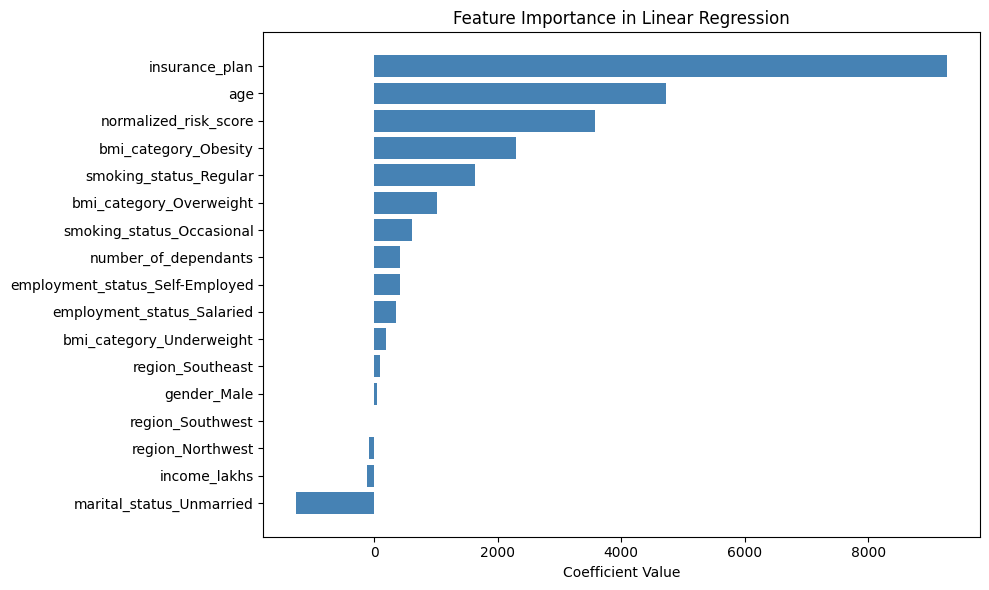

🔝 Top 5 Positive Coefficients:
   insurance_plan: 9282.3675
   age: 4730.9122
   normalized_risk_score: 3570.9960
   bmi_category_Obesity: 2292.5864
   smoking_status_Regular: 1627.0050

🔻 Top 5 Negative Coefficients:
   marital_status_Unmarried: -1266.9792
   income_lakhs: -122.9159
   region_Northwest: -82.3850
   region_Southwest: -3.2426
   gender_Male: 43.0083


In [38]:
# 📉 Linear Regression Model - Baseline Model
print("🚀 Training Linear Regression Model...")
lr = LinearRegression()
lr_model, lr_predictions = evaluate_model(lr, "Linear Regression", X_train, X_test, y_train, y_test)

# Feature importance visualization for Linear Regression
feature_importance = lr_model.coef_
coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(coef_df.index, coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Linear Regression')
plt.tight_layout()
plt.show()

# Display top positive and negative coefficients
print("🔝 Top 5 Positive Coefficients:")
top_positive = coef_df.sort_values('Coefficient', ascending=False).head(5)
for feature, coef in top_positive.iterrows():
    print(f"   {feature}: {coef['Coefficient']:.4f}")

print("\n🔻 Top 5 Negative Coefficients:")
top_negative = coef_df.sort_values('Coefficient', ascending=True).head(5)
for feature, coef in top_negative.iterrows():
    print(f"   {feature}: {coef['Coefficient']:.4f}")

### 🔵 Ridge Regression Model 🛡️
Implementing Ridge regression to handle multicollinearity through L2 regularization.

🚀 Training Ridge Regression Model...
🎯 Ridge Regression Performance Metrics:
   📈 Training R²: 0.7873
   📊 Test R²: 0.7825
   📉 MSE: 5546769.56
   🎲 RMSE: 2355.16
   📋 MAE: 1908.47
   📊 MAPE: 23.08%
--------------------------------------------------


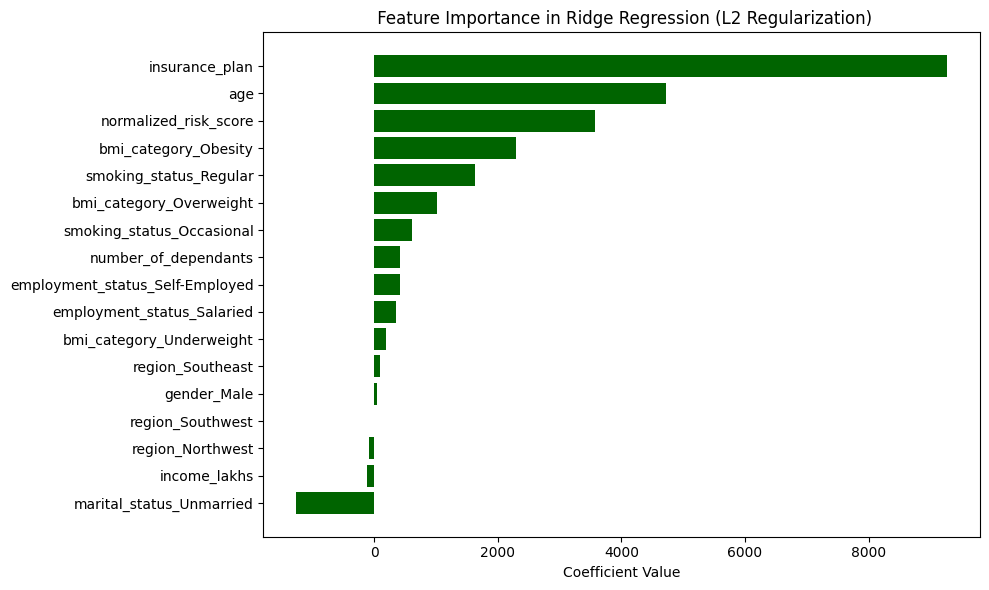

🔍 Coefficient Comparison (Ridge vs Linear Regression):
Top 5 Most Shrunk Features:
   income_lakhs: 2.81% shrinkage
   region_Southwest: -1.27% shrinkage
   number_of_dependants: -0.33% shrinkage
   bmi_category_Underweight: 0.27% shrinkage
   employment_status_Salaried: -0.08% shrinkage


In [39]:
# 🔵 Ridge Regression Model - L2 Regularization
print("🚀 Training Ridge Regression Model...")
ridge = Ridge(alpha=1.0, random_state=42)
ridge_model, ridge_predictions = evaluate_model(ridge, "Ridge Regression", X_train, X_test, y_train, y_test)

# Feature importance visualization for Ridge Regression
ridge_coef_df = pd.DataFrame(ridge_model.coef_, index=X_test.columns, columns=['Coefficient'])
ridge_coef_df = ridge_coef_df.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(ridge_coef_df.index, ridge_coef_df['Coefficient'], color='darkgreen')
plt.xlabel('Coefficient Value')
plt.title(' Feature Importance in Ridge Regression (L2 Regularization)')
plt.tight_layout()
plt.show()

# Compare coefficient shrinkage with Linear Regression
print("🔍 Coefficient Comparison (Ridge vs Linear Regression):")
comparison_df = pd.DataFrame({
    'Linear_Regression': lr_model.coef_,
    'Ridge_Regression': ridge_model.coef_
}, index=X_test.columns)
comparison_df['Shrinkage'] = comparison_df['Linear_Regression'] - comparison_df['Ridge_Regression']
comparison_df['Shrinkage_Pct'] = (comparison_df['Shrinkage'] / comparison_df['Linear_Regression']) * 100

print("Top 5 Most Shrunk Features:")
most_shrunk = comparison_df.reindex(comparison_df['Shrinkage_Pct'].abs().sort_values(ascending=False).index).head(5)
for feature, row in most_shrunk.iterrows():
    print(f"   {feature}: {row['Shrinkage_Pct']:.2f}% shrinkage")

### 🟠 Lasso Regression Model ✂️
Implementing Lasso regression for feature selection through L1 regularization.

🚀 Training Lasso Regression Model...
🎯 Lasso Regression Performance Metrics:
   📈 Training R²: 0.7873
   📊 Test R²: 0.7825
   📉 MSE: 5546808.63
   🎲 RMSE: 2355.17
   📋 MAE: 1908.47
   📊 MAPE: 23.08%
--------------------------------------------------


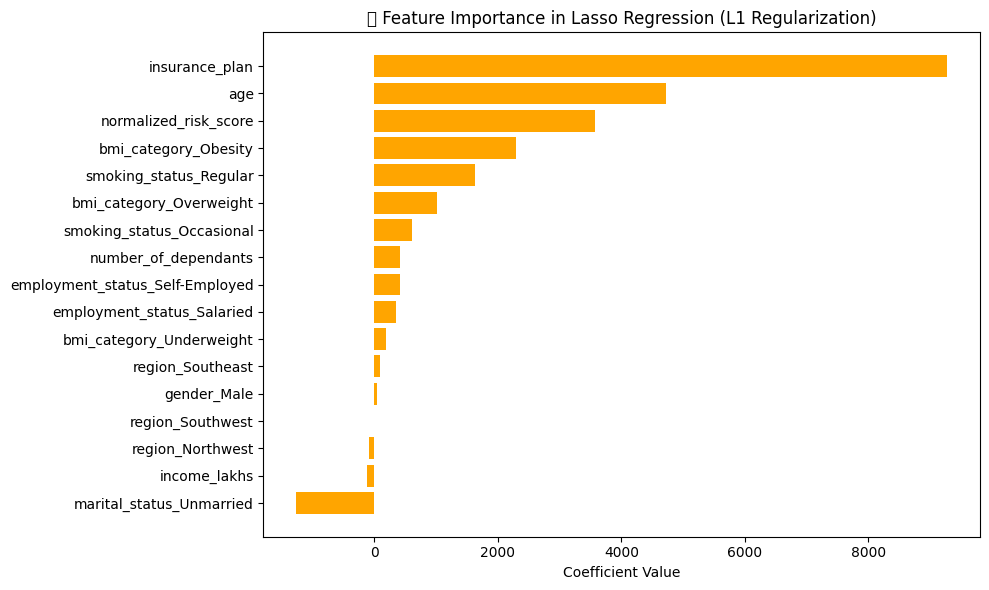

✂️ Feature Selection Results:
   🟢 Selected features: 17 out of 17
   🔴 Eliminated features: 0

🟢 Selected Features:
   marital_status_Unmarried: -1267.9663
   income_lakhs: -119.9074
   region_Northwest: -81.2275
   region_Southwest: -2.2630
   gender_Male: 42.6363
   region_Southeast: 89.7966
   bmi_category_Underweight: 182.6027
   employment_status_Salaried: 356.7140
   employment_status_Self-Employed: 414.9524
   number_of_dependants: 419.7663
   smoking_status_Occasional: 608.2890
   bmi_category_Overweight: 1013.9719
   smoking_status_Regular: 1626.6272
   bmi_category_Obesity: 2291.0870
   normalized_risk_score: 3570.3842
   age: 4730.7408
   insurance_plan: 9280.9577

🔴 Eliminated Features:


In [40]:
# 🟠 Lasso Regression Model - L1 Regularization for Feature Selection
print("🚀 Training Lasso Regression Model...")
lasso = Lasso(alpha=0.1, random_state=42)
lasso_model, lasso_predictions = evaluate_model(lasso, "Lasso Regression", X_train, X_test, y_train, y_test)

# Feature importance visualization for Lasso Regression
lasso_coef_df = pd.DataFrame(lasso_model.coef_, index=X_test.columns, columns=['Coefficient'])
lasso_coef_df = lasso_coef_df.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(lasso_coef_df.index, lasso_coef_df['Coefficient'], color='orange')
plt.xlabel('Coefficient Value')
plt.title('🟠 Feature Importance in Lasso Regression (L1 Regularization)')
plt.tight_layout()
plt.show()

# Feature Selection Analysis
selected_features = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]
eliminated_features = lasso_coef_df[lasso_coef_df['Coefficient'] == 0]

print(f"✂️ Feature Selection Results:")
print(f"   🟢 Selected features: {len(selected_features)} out of {len(lasso_coef_df)}")
print(f"   🔴 Eliminated features: {len(eliminated_features)}")

print(f"\n🟢 Selected Features:")
for feature, coef in selected_features.iterrows():
    print(f"   {feature}: {coef['Coefficient']:.4f}")

print(f"\n🔴 Eliminated Features:")
for feature in eliminated_features.index:
    print(f"   {feature}")

### 🌳 Random Forest Regression Model 🌲
Implementing ensemble method to capture non-linear relationships and feature interactions.

🚀 Training Random Forest Regression Model...
🎯 Random Forest Performance Metrics:
   📈 Training R²: 0.9158
   📊 Test R²: 0.8999
   📉 MSE: 2553538.56
   🎲 RMSE: 1597.98
   📋 MAE: 1300.12
   📊 MAPE: 18.03%
--------------------------------------------------


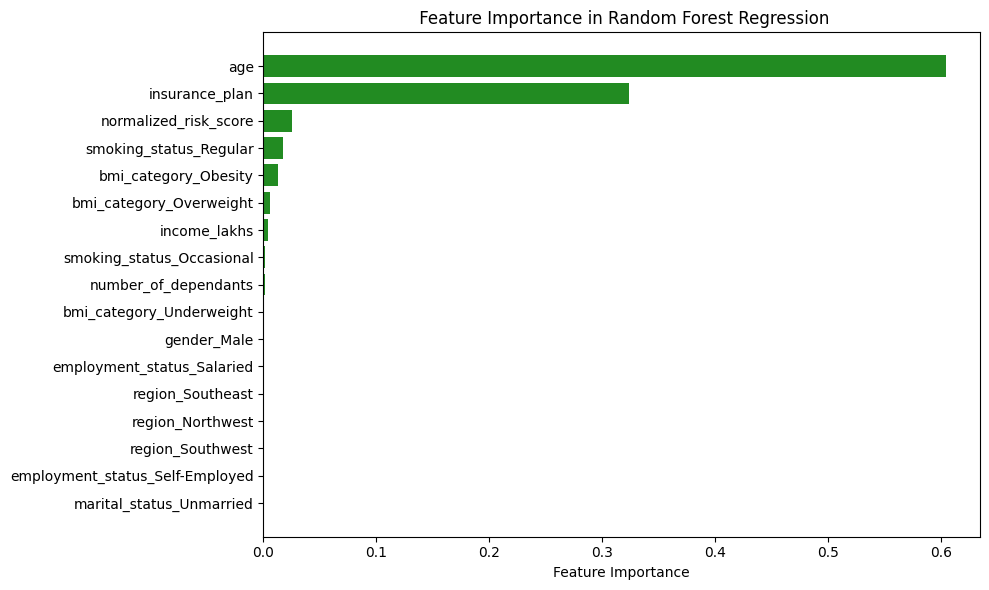

🌲 Top 10 Most Important Features in Random Forest:
 1. age: 0.6043
 2. insurance_plan: 0.3240
 3. normalized_risk_score: 0.0254
 4. smoking_status_Regular: 0.0175
 5. bmi_category_Obesity: 0.0131
 6. bmi_category_Overweight: 0.0057
 7. income_lakhs: 0.0042
 8. smoking_status_Occasional: 0.0012
 9. number_of_dependants: 0.0009
10. bmi_category_Underweight: 0.0006

🌳 Random Forest Insights:
   🌲 Number of trees: 100
   📊 Max depth: 10
   📋 Min samples split: 5
   🎯 Out-of-bag score: N/A


In [41]:
# 🌳 Random Forest Regression Model - Ensemble Method
print("🚀 Training Random Forest Regression Model...")
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model, rf_predictions = evaluate_model(rf, "Random Forest", X_train, X_test, y_train, y_test)

# Feature importance visualization for Random Forest
rf_importance = rf_model.feature_importances_
rf_coef_df = pd.DataFrame(rf_importance, index=X_train.columns, columns=['Importance'])
rf_coef_df = rf_coef_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(rf_coef_df.index, rf_coef_df['Importance'], color='forestgreen')
plt.xlabel('Feature Importance')
plt.title(' Feature Importance in Random Forest Regression')
plt.tight_layout()
plt.show()

# Display top important features
print("🌲 Top 10 Most Important Features in Random Forest:")
top_features = rf_coef_df.sort_values('Importance', ascending=False).head(10)
for i, (feature, importance) in enumerate(top_features.iterrows(), 1):
    print(f"{i:2d}. {feature}: {importance['Importance']:.4f}")

# Tree-based feature importance insights
print(f"\n🌳 Random Forest Insights:")
print(f"   🌲 Number of trees: {rf_model.n_estimators}")
print(f"   📊 Max depth: {rf_model.max_depth}")
print(f"   📋 Min samples split: {rf_model.min_samples_split}")
print(f"   🎯 Out-of-bag score: {rf_model.oob_score_ if hasattr(rf_model, 'oob_score_') else 'N/A'}")

### 🚀 XGBoost Regression Model ⚡
Implementing gradient boosting with basic configuration.

🚀 Training XGBoost Regression Model...
🎯 XGBoost (Basic) Performance Metrics:
   📈 Training R²: 0.9294
   📊 Test R²: 0.8942
   📉 MSE: 2697288.50
   🎲 RMSE: 1642.34
   📋 MAE: 1326.29
   📊 MAPE: 18.30%
--------------------------------------------------


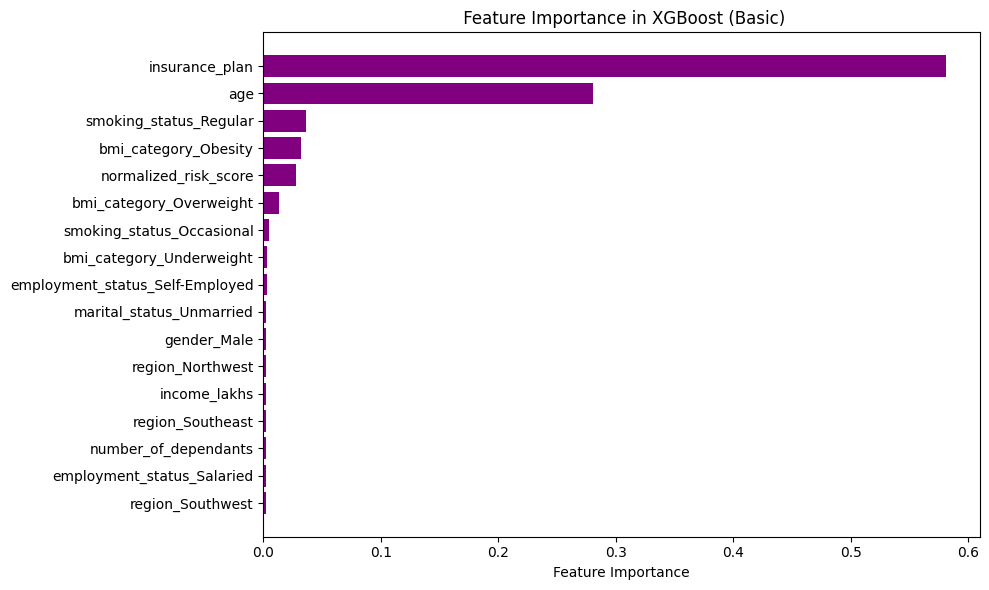

In [42]:
# 🚀 XGBoost Regression Model - Basic Configuration
print("🚀 Training XGBoost Regression Model...")
xgb_basic = XGBRegressor(random_state=42)
xgb_model, xgb_predictions = evaluate_model(xgb_basic, "XGBoost (Basic)", X_train, X_test, y_train, y_test)

# Feature importance visualization for XGBoost
xgb_importance = xgb_model.feature_importances_
xgb_coef_df = pd.DataFrame(xgb_importance, index=X_train.columns, columns=['Importance'])
xgb_coef_df = xgb_coef_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(xgb_coef_df.index, xgb_coef_df['Importance'], color='purple')
plt.xlabel('Feature Importance')
plt.title(' Feature Importance in XGBoost (Basic)')
plt.tight_layout()
plt.show()

### ⚡ XGBoost with Hyperparameter Tuning 🎯
Optimizing XGBoost performance through automated hyperparameter search.

🎯 Performing XGBoost Hyperparameter Tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
🎯 Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
📊 Best Cross-Validation Score: 0.9041
🎯 XGBoost (Optimized) Performance Metrics:
   📈 Training R²: 0.9108
   📊 Test R²: 0.9008
   📉 MSE: 2530981.50
   🎲 RMSE: 1590.91
   📋 MAE: 1293.45
   📊 MAPE: 17.97%
--------------------------------------------------


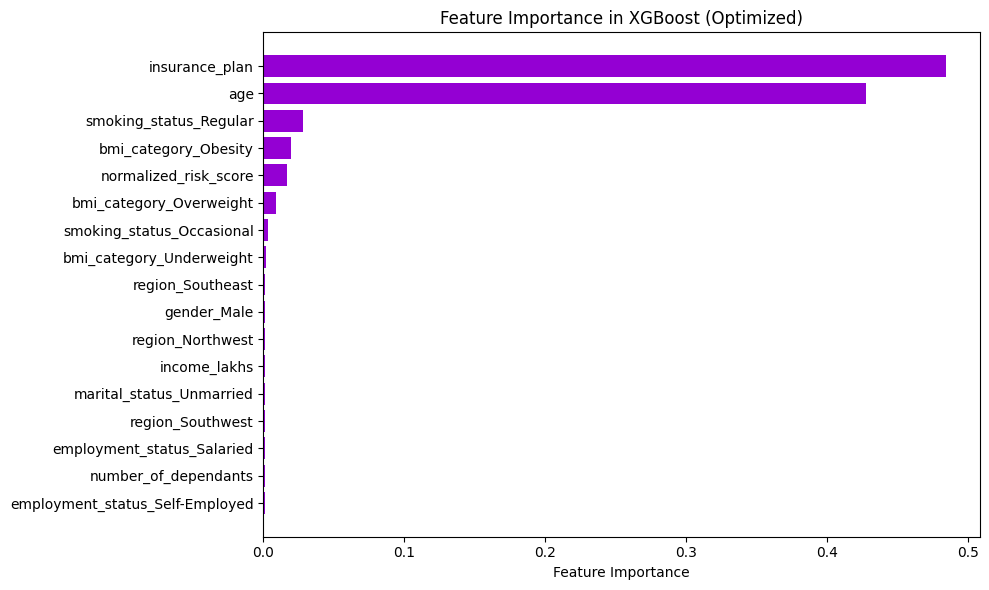

🔍 XGBoost Performance Comparison:
   Basic XGBoost R²: 0.8942
   Optimized XGBoost R²: 0.9008
   📈 Improvement: 0.0065 (0.73%)


In [43]:
# ⚡ XGBoost with Hyperparameter Tuning
print("🎯 Performing XGBoost Hyperparameter Tuning...")

# Define parameter grid for optimization
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform randomized search for optimal parameters
xgb_tuned = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb_tuned, 
    param_grid, 
    n_iter=20,  # Number of parameter combinations to try
    cv=5,       # 5-fold cross validation
    scoring='r2', 
    random_state=42, 
    n_jobs=-1,
    verbose=1
)

# Fit the randomized search
random_search.fit(X_train, y_train)

print(f"🎯 Best XGBoost Parameters: {random_search.best_params_}")
print(f"📊 Best Cross-Validation Score: {random_search.best_score_:.4f}")

# Evaluate the optimized model
best_xgb_model = random_search.best_estimator_
best_xgb_model, best_xgb_predictions = evaluate_model(
    best_xgb_model, "XGBoost (Optimized)", X_train, X_test, y_train, y_test
)

# Feature importance for optimized XGBoost
best_xgb_importance = best_xgb_model.feature_importances_
best_xgb_coef_df = pd.DataFrame(best_xgb_importance, index=X_train.columns, columns=['Importance'])
best_xgb_coef_df = best_xgb_coef_df.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(best_xgb_coef_df.index, best_xgb_coef_df['Importance'], color='darkviolet')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost (Optimized)')
plt.tight_layout()
plt.show()

# Compare basic vs optimized XGBoost
print("🔍 XGBoost Performance Comparison:")
print(f"   Basic XGBoost R²: {model_results['XGBoost (Basic)']['test_r2']:.4f}")
print(f"   Optimized XGBoost R²: {model_results['XGBoost (Optimized)']['test_r2']:.4f}")
improvement = model_results['XGBoost (Optimized)']['test_r2'] - model_results['XGBoost (Basic)']['test_r2']
print(f"   📈 Improvement: {improvement:.4f} ({improvement/model_results['XGBoost (Basic)']['test_r2']*100:.2f}%)")

### 📊 Comprehensive Model Performance Summary 🏆
Detailed comparison of all trained models to identify the best performer.

🏆 COMPREHENSIVE MODEL PERFORMANCE SUMMARY
                     train_r2  test_r2           mse       rmse        mae  \
Linear Regression      0.7873   0.7825  5.546736e+06  2355.1509  1908.4488   
Ridge Regression       0.7873   0.7825  5.546770e+06  2355.1581  1908.4674   
Lasso Regression       0.7873   0.7825  5.546809e+06  2355.1664  1908.4657   
Random Forest          0.9158   0.8999  2.553539e+06  1597.9795  1300.1197   
XGBoost (Basic)        0.9294   0.8942  2.697288e+06  1642.3424  1326.2892   
XGBoost (Optimized)    0.9108   0.9008  2.530982e+06  1590.9059  1293.4480   

                        mape  
Linear Regression    23.0786  
Ridge Regression     23.0788  
Lasso Regression     23.0784  
Random Forest        18.0271  
XGBoost (Basic)      18.2990  
XGBoost (Optimized)  17.9653  


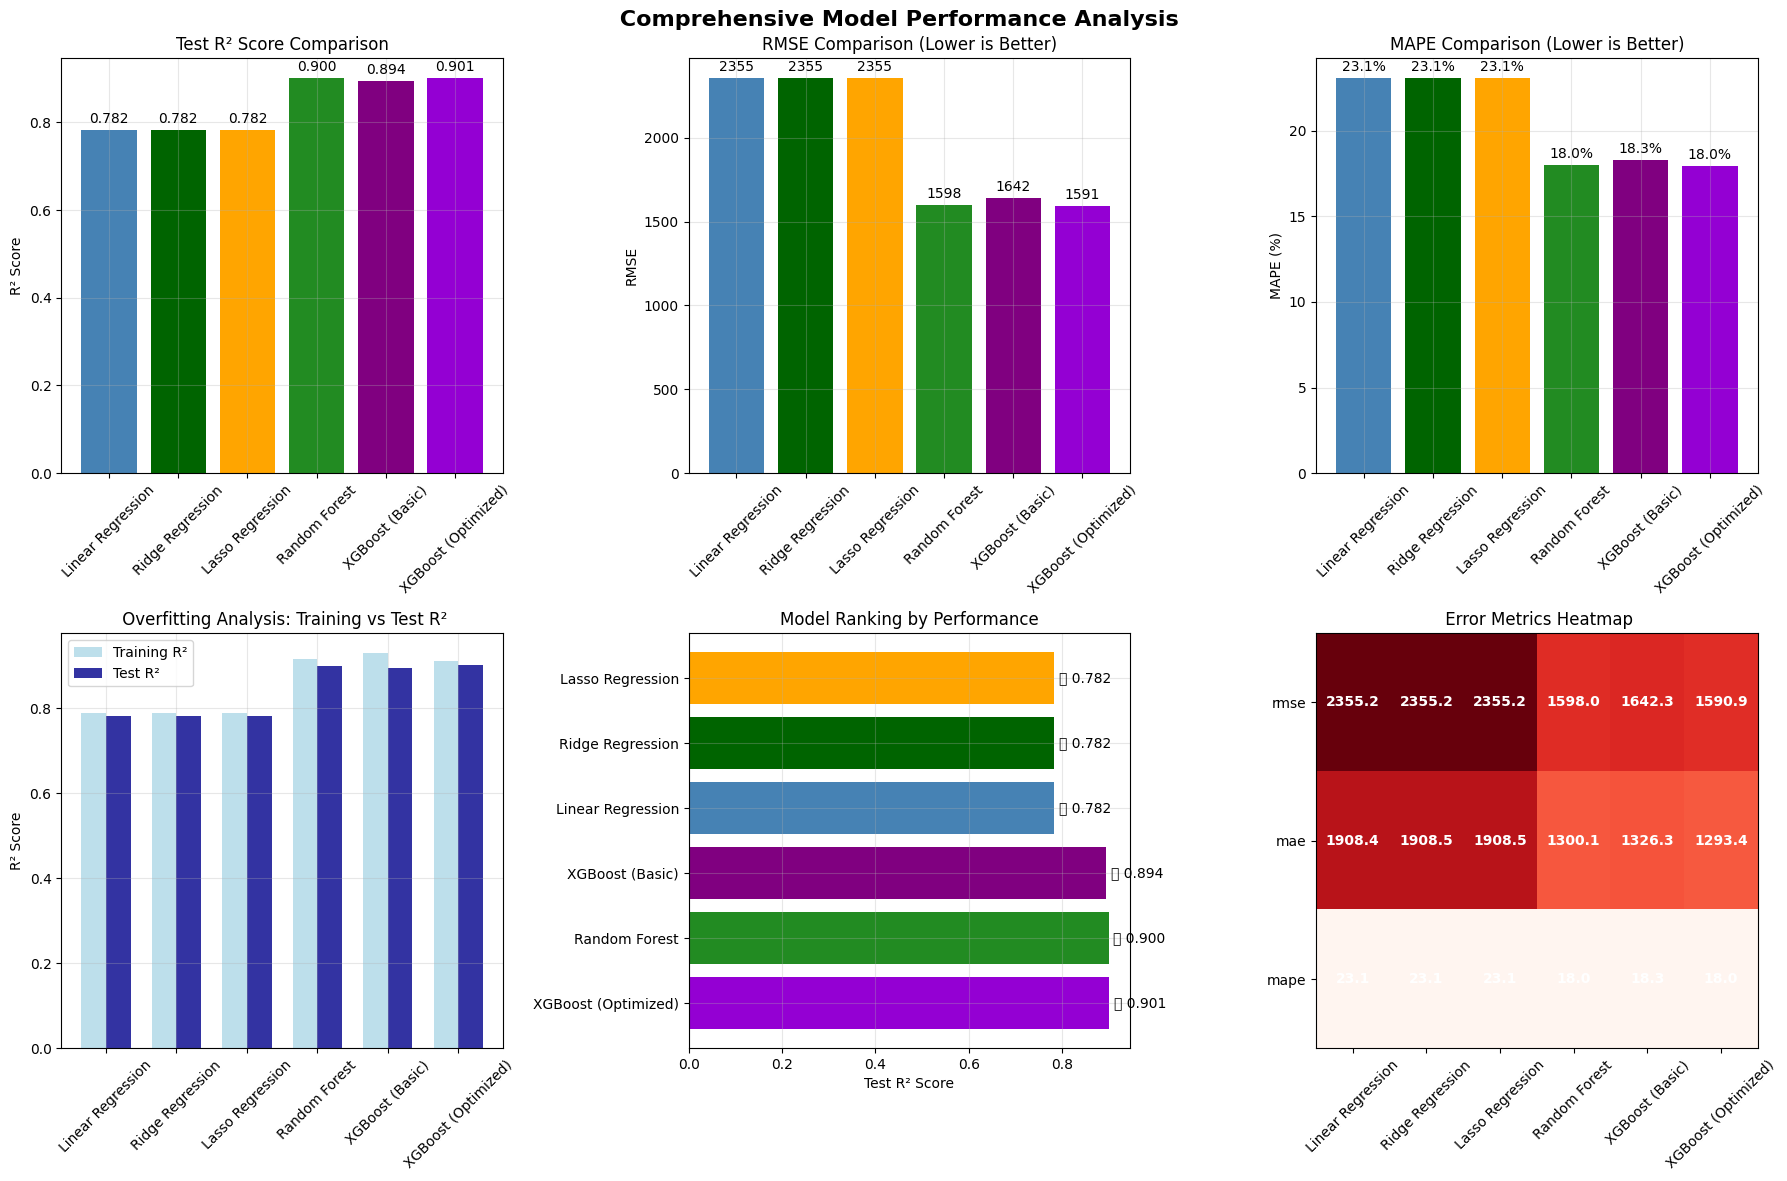


🏆 BEST PERFORMING MODEL: XGBoost (Optimized)
   📈 Test R² Score: 0.9008
   📉 RMSE: 1590.91
   📊 MAPE: 17.97%

🔍 OVERFITTING ANALYSIS:
   Linear Regression: ✅ Low overfitting (0.005)
   Ridge Regression: ✅ Low overfitting (0.005)
   Lasso Regression: ✅ Low overfitting (0.005)
   Random Forest: ✅ Low overfitting (0.016)
   XGBoost (Basic): ✅ Low overfitting (0.035)
   XGBoost (Optimized): ✅ Low overfitting (0.010)

💡 MODEL RECOMMENDATIONS:
   🥇 Best Overall: XGBoost (Optimized) (R² = 0.901)
   🎯 Most Stable: Linear Regression
   ⚡ Fastest Training: Linear Regression (baseline)
   🌳 Best for Interpretation: Random Forest (feature importance)


In [44]:
# Create comprehensive model performance comparison
results_df = pd.DataFrame(model_results).T
results_df = results_df.round(4)

print("🏆 COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("=" * 80)
print(results_df)

# Create detailed performance visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(' Comprehensive Model Performance Analysis', fontsize=16, fontweight='bold')

# Define colors for each model
colors = ['steelblue', 'darkgreen', 'orange', 'forestgreen', 'purple', 'darkviolet']
model_colors = dict(zip(results_df.index, colors[:len(results_df)]))

# 1. R² Score comparison
axes[0,0].bar(results_df.index, results_df['test_r2'], 
              color=[model_colors[model] for model in results_df.index])
axes[0,0].set_title('Test R² Score Comparison')
axes[0,0].set_ylabel('R² Score')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for i, (model, score) in enumerate(zip(results_df.index, results_df['test_r2'])):
    axes[0,0].text(i, score + 0.01, f'{score:.3f}', ha='center', va='bottom', fontsize=10)

# 2. RMSE comparison
axes[0,1].bar(results_df.index, results_df['rmse'], 
              color=[model_colors[model] for model in results_df.index])
axes[0,1].set_title('RMSE Comparison (Lower is Better)')
axes[0,1].set_ylabel('RMSE')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].grid(True, alpha=0.3)

# Add value labels on bars
for i, (model, rmse) in enumerate(zip(results_df.index, results_df['rmse'])):
    axes[0,1].text(i, rmse + max(results_df['rmse'])*0.01, f'{rmse:.0f}', ha='center', va='bottom', fontsize=10)

# 3. MAPE comparison
axes[0,2].bar(results_df.index, results_df['mape'], 
              color=[model_colors[model] for model in results_df.index])
axes[0,2].set_title('MAPE Comparison (Lower is Better)')
axes[0,2].set_ylabel('MAPE (%)')
axes[0,2].tick_params(axis='x', rotation=45)
axes[0,2].grid(True, alpha=0.3)

# Add value labels on bars
for i, (model, mape) in enumerate(zip(results_df.index, results_df['mape'])):
    axes[0,2].text(i, mape + max(results_df['mape'])*0.01, f'{mape:.1f}%', ha='center', va='bottom', fontsize=10)

# 4. Training vs Test R² (Overfitting Analysis)
x = np.arange(len(results_df))
width = 0.35
axes[1,0].bar(x - width/2, results_df['train_r2'], width, label='Training R²', alpha=0.8, color='lightblue')
axes[1,0].bar(x + width/2, results_df['test_r2'], width, label='Test R²', alpha=0.8, color='darkblue')
axes[1,0].set_title(' Overfitting Analysis: Training vs Test R²')
axes[1,0].set_ylabel('R² Score')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(results_df.index, rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 5. Performance Ranking
performance_rank = results_df.sort_values('test_r2', ascending=False)
axes[1,1].barh(range(len(performance_rank)), performance_rank['test_r2'], 
               color=[model_colors[model] for model in performance_rank.index])
axes[1,1].set_yticks(range(len(performance_rank)))
axes[1,1].set_yticklabels(performance_rank.index)
axes[1,1].set_xlabel('Test R² Score')
axes[1,1].set_title('Model Ranking by Performance')
axes[1,1].grid(True, alpha=0.3)

# Add ranking medals
medals = ['🥇', '🥈', '🥉'] + ['🏅'] * (len(performance_rank) - 3)
for i, (medal, score) in enumerate(zip(medals, performance_rank['test_r2'])):
    axes[1,1].text(score + 0.01, i, f'{medal} {score:.3f}', va='center', fontsize=10)

# 6. Error Metrics Heatmap
error_metrics = results_df[['rmse', 'mae', 'mape']].T
im = axes[1,2].imshow(error_metrics.values, cmap='Reds', aspect='auto')
axes[1,2].set_xticks(range(len(error_metrics.columns)))
axes[1,2].set_xticklabels(error_metrics.columns, rotation=45)
axes[1,2].set_yticks(range(len(error_metrics.index)))
axes[1,2].set_yticklabels(error_metrics.index)
axes[1,2].set_title(' Error Metrics Heatmap')

# Add text annotations to heatmap
for i in range(len(error_metrics.index)):
    for j in range(len(error_metrics.columns)):
        text = axes[1,2].text(j, i, f'{error_metrics.iloc[i, j]:.1f}',
                             ha="center", va="center", color="white", fontweight='bold')

plt.tight_layout()
plt.show()

# Identify and highlight best performing model
best_model_name = results_df['test_r2'].idxmax()
best_rmse = results_df.loc[best_model_name, 'rmse']
best_r2 = results_df.loc[best_model_name, 'test_r2']
best_mape = results_df.loc[best_model_name, 'mape']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   📈 Test R² Score: {best_r2:.4f}")
print(f"   📉 RMSE: {best_rmse:.2f}")
print(f"   📊 MAPE: {best_mape:.2f}%")

# Calculate and display overfitting analysis
print(f"\n🔍 OVERFITTING ANALYSIS:")
for model in results_df.index:
    overfitting = results_df.loc[model, 'train_r2'] - results_df.loc[model, 'test_r2']
    if overfitting > 0.1:
        status = "⚠️ High"
    elif overfitting < 0.05:
        status = "✅ Low"
    else:
        status = "⚡ Moderate"
    print(f"   {model}: {status} overfitting ({overfitting:.3f})")

# Model recommendations
print(f"\n💡 MODEL RECOMMENDATIONS:")
print(f"   🥇 Best Overall: {best_model_name} (R² = {best_r2:.3f})")
print(f"   🎯 Most Stable: {results_df.loc[results_df['train_r2'] - results_df['test_r2'] == (results_df['train_r2'] - results_df['test_r2']).min()].index[0]}")
print(f"   ⚡ Fastest Training: Linear Regression (baseline)")
print(f"   🌳 Best for Interpretation: Random Forest (feature importance)")

### 🔍 Model Segmentation Analysis 📊
Creating specialized models for different demographic segments to improve prediction accuracy.

In [45]:
# Select best model predictions for error analysis
best_model_mapping = {
    "Linear Regression": lr_model,
    "Ridge Regression": ridge_model,
    "Lasso Regression": lasso_model,
    "Random Forest": rf_model,
    "XGBoost (Basic)": xgb_model,
    "XGBoost (Optimized)": best_xgb_model
}

# Get predictions from the best model
if best_model_name == "XGBoost (Optimized)":
    y_pred_analysis = best_xgb_predictions
elif best_model_name == "Random Forest":
    y_pred_analysis = rf_predictions
elif best_model_name == "Ridge Regression":
    y_pred_analysis = ridge_predictions
elif best_model_name == "Lasso Regression":
    y_pred_analysis = lasso_predictions
elif best_model_name == "XGBoost (Basic)":
    y_pred_analysis = xgb_predictions
else:  # Linear Regression
    y_pred_analysis = lr_predictions

print(f"🎯 Using predictions from {best_model_name} for error analysis")
print(f"📊 Predictions shape: {y_pred_analysis.shape}")

🎯 Using predictions from XGBoost (Optimized) for error analysis
📊 Predictions shape: (6172,)


In [46]:
# 🔍 Demographic Segmentation Analysis
print("🎯 DEMOGRAPHIC SEGMENTATION FOR MODEL IMPROVEMENT")
print("=" * 60)

# Analyze prediction errors by demographic segments
def analyze_segment_errors(X_test, y_test, y_pred, segment_col, segment_name):
    """Analyze prediction errors for different segments"""
    
    # Calculate errors
    residual = y_pred - y_test
    abs_residual_pct = np.abs((residual / y_test) * 100)
    
    # Create analysis DataFrame
    segment_analysis = pd.DataFrame({
        'segment': X_test[segment_col] if segment_col in X_test.columns else 'N/A',
        'actual': y_test,
        'predicted': y_pred,
        'abs_error_pct': abs_residual_pct
    })
    
    if segment_col in X_test.columns:
        # Group by segment and calculate metrics
        segment_stats = segment_analysis.groupby('segment').agg({
            'abs_error_pct': ['mean', 'median', 'count'],
            'actual': 'mean',
            'predicted': 'mean'
        }).round(2)
        
        segment_stats.columns = ['Mean_Error_%', 'Median_Error_%', 'Count', 'Avg_Actual', 'Avg_Predicted']
        
        print(f"\n📊 {segment_name} Segment Analysis:")
        print(segment_stats)
        
        return segment_stats
    else:
        print(f"⚠️ Column {segment_col} not found in dataset")
        return None

# Convert scaled features back to original for segmentation
# Prepare full scaled features for inverse transform
full_scaled_features = X_test.copy()
full_scaled_features.insert(2, 'income_level', 0)  # Add back dropped column
full_scaled_features = full_scaled_features[['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan']]

# Inverse transform to get original values
original_features = pd.DataFrame(
    scaler.inverse_transform(full_scaled_features),
    columns=['age', 'number_of_dependants', 'income_level', 'income_lakhs', 'insurance_plan'],
    index=X_test.index
)

# Create age segments
age_bins = [0, 30, 45, 60, 100]
age_labels = ['Young (≤30)', 'Middle-aged (31-45)', 'Mature (46-60)', 'Senior (>60)']
original_features['age_segment'] = pd.cut(original_features['age'], bins=age_bins, labels=age_labels)

# Create income segments
income_bins = [0, 15, 30, 50, 1000]
income_labels = ['Low (≤15L)', 'Medium (15-30L)', 'High (30-50L)', 'Very High (>50L)']
original_features['income_segment'] = pd.cut(original_features['income_lakhs'], bins=income_bins, labels=income_labels)

# Add segments to X_test for analysis
X_test_with_segments = X_test.copy()
X_test_with_segments['age_segment'] = original_features['age_segment']
X_test_with_segments['income_segment'] = original_features['income_segment']
X_test_with_segments['insurance_plan_orig'] = original_features['insurance_plan']
# Analyze errors by different segments using best model predictions
age_stats = analyze_segment_errors(X_test_with_segments, y_test, y_pred_analysis, 'age_segment', 'Age')
income_stats = analyze_segment_errors(X_test_with_segments, y_test, y_pred_analysis, 'income_segment', 'Income')

# Insurance plan analysis
insurance_mapping = {1: 'Bronze', 2: 'Silver', 3: 'Gold'}
X_test_with_segments['insurance_plan_name'] = X_test_with_segments['insurance_plan_orig'].map(insurance_mapping)
insurance_stats = analyze_segment_errors(X_test_with_segments, y_test, y_pred_analysis, 'insurance_plan_name', 'Insurance Plan')

🎯 DEMOGRAPHIC SEGMENTATION FOR MODEL IMPROVEMENT

📊 Age Segment Analysis:
                     Mean_Error_%  Median_Error_%  Count  Avg_Actual  \
segment                                                                
Young (≤30)                 17.97           14.39   6172     9915.38   
Middle-aged (31-45)           NaN             NaN      0         NaN   
Mature (46-60)                NaN             NaN      0         NaN   
Senior (>60)                  NaN             NaN      0         NaN   

                     Avg_Predicted  
segment                             
Young (≤30)            9914.730469  
Middle-aged (31-45)            NaN  
Mature (46-60)                 NaN  
Senior (>60)                   NaN  

📊 Income Segment Analysis:
                  Mean_Error_%  Median_Error_%  Count  Avg_Actual  \
segment                                                             
Low (≤15L)               18.88           14.74   3048     9059.08   
Medium (15-30L)          17.90      

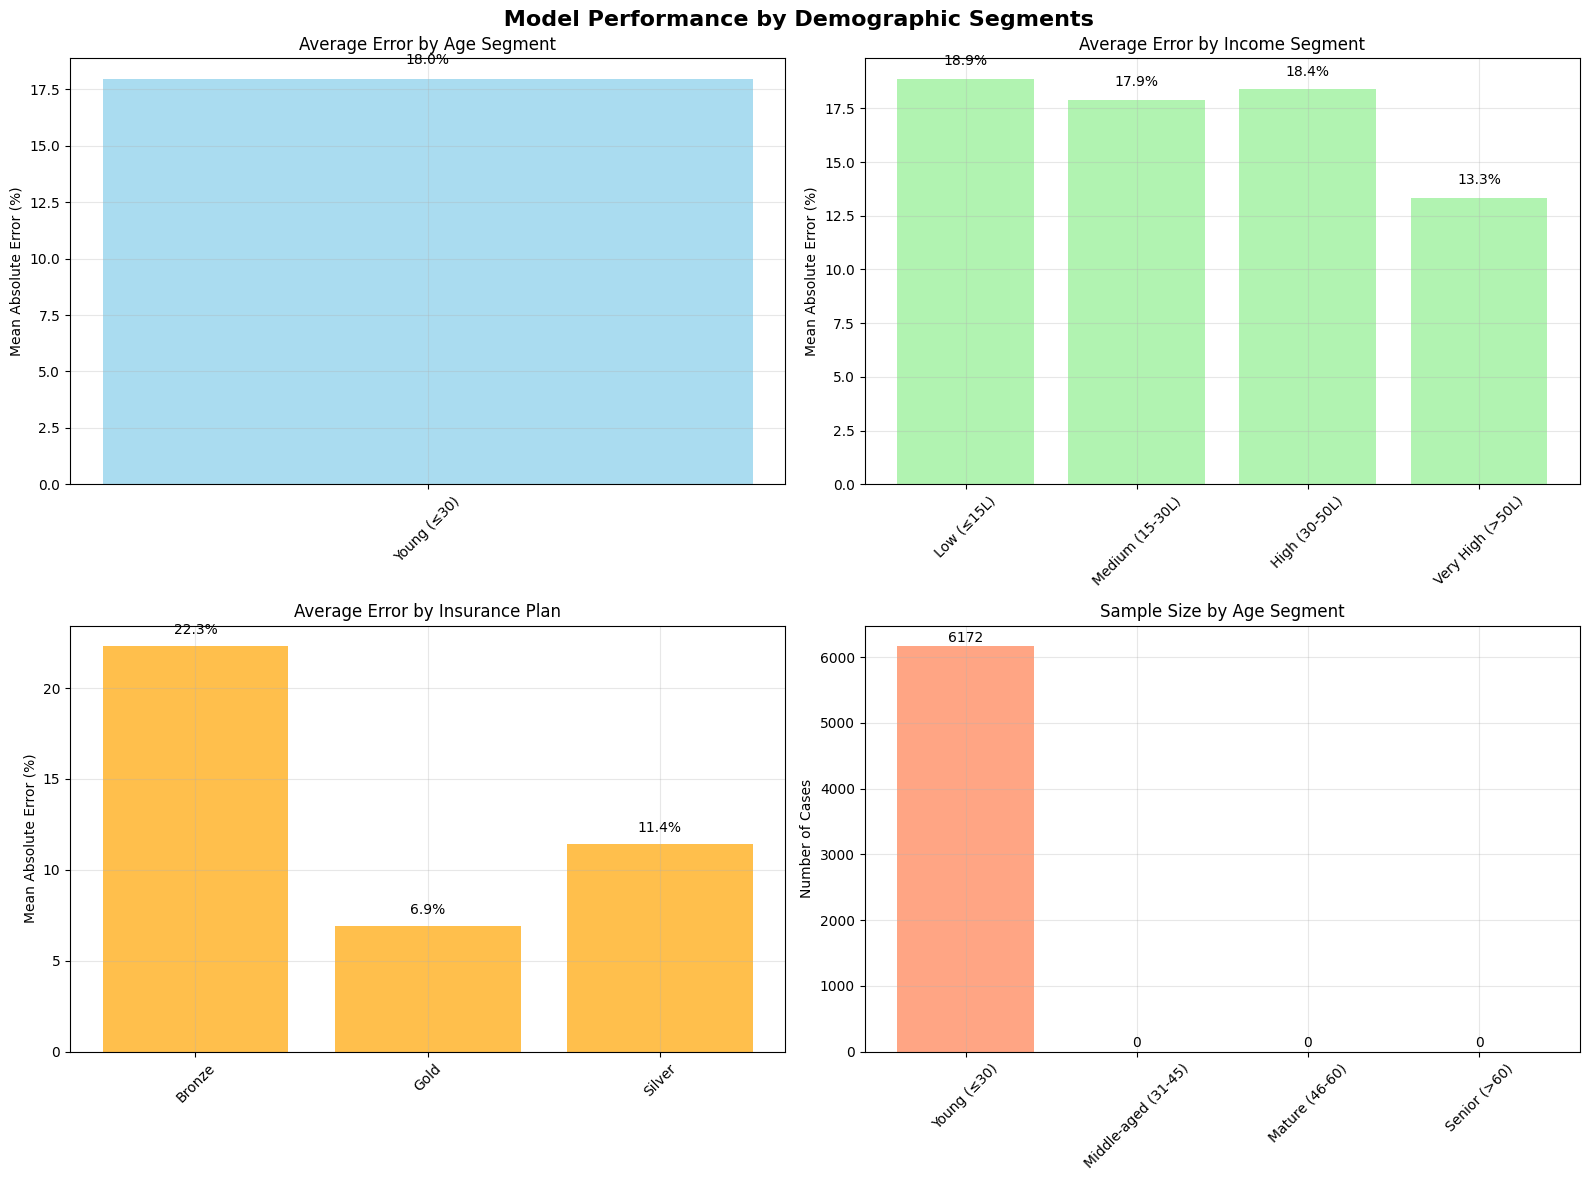

In [47]:
# Visualize segment performance
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(' Model Performance by Demographic Segments', fontsize=16, fontweight='bold')

# Age segment performance
if age_stats is not None:
    axes[0,0].bar(age_stats.index, age_stats['Mean_Error_%'], color='skyblue', alpha=0.7)
    axes[0,0].set_title('Average Error by Age Segment')
    axes[0,0].set_ylabel('Mean Absolute Error (%)')
    axes[0,0].tick_params(axis='x', rotation=45)
    axes[0,0].grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(age_stats['Mean_Error_%']):
        axes[0,0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# Income segment performance
if income_stats is not None:
    axes[0,1].bar(income_stats.index, income_stats['Mean_Error_%'], color='lightgreen', alpha=0.7)
    axes[0,1].set_title('Average Error by Income Segment')
    axes[0,1].set_ylabel('Mean Absolute Error (%)')
    axes[0,1].tick_params(axis='x', rotation=45)
    axes[0,1].grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(income_stats['Mean_Error_%']):
        axes[0,1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# Insurance plan performance
if insurance_stats is not None:
    axes[1,0].bar(insurance_stats.index, insurance_stats['Mean_Error_%'], color='orange', alpha=0.7)
    axes[1,0].set_title('Average Error by Insurance Plan')
    axes[1,0].set_ylabel('Mean Absolute Error (%)')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(insurance_stats['Mean_Error_%']):
        axes[1,0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# Sample size by segments
if age_stats is not None:
    axes[1,1].bar(age_stats.index, age_stats['Count'], color='coral', alpha=0.7)
    axes[1,1].set_title('Sample Size by Age Segment')
    axes[1,1].set_ylabel('Number of Cases')
    axes[1,1].tick_params(axis='x', rotation=45)
    axes[1,1].grid(True, alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(age_stats['Count']):
        axes[1,1].text(i, v + 20, f'{v}', ha='center', va='bottom')

plt.tight_layout()
plt.show()